# Dataset Description

The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

D_* = Delinquency variables, 
S_* = Spend variables, 
P_* = Payment variables ,
B_* = Balance variables, 
R_* = Risk variables.

#### the following features being categorical:

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

Your task is to predict, for each customer_ID, the probability of a future payment default (target = 1)


## IMPORT ESSENTIAL LIBRERIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.impute import SimpleImputer
from scipy import stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

### IMPORT TRAIN DATA

In [4]:
df_train = pd.read_feather('df_train.feather')

In [5]:
df_train

customer_ID         S_2  \
0        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09   
13       00000fd6641609c6ece5454664794f0340ad84dddce9a2...  2017-03-01   
26       00001b22f846c82c51f6e3958ccd81970162bae8b007e8...  2017-03-11   
39       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  2017-03-31   
52       00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...  2017-03-30   
...                                                    ...         ...   
5531386  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...  2017-03-20   
5531399  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...  2017-03-22   
5531412  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...  2017-03-16   
5531425  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...  2017-03-25   
5531438  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-03-20   

              P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0        0.938477  0.001734  0.008728  1.006836  0.009224  0.124023  0.008774   
13       0.929199  0.382812  0.025787  1.002930  0.005516  0.089783  0.001479   
26       0.876465  0.001469  0.001472  0.811035  0.005955       NaN  0.008400   
39       0.567383  0.268555  0.070312  0.812012  0.004227  0.407471  0.007732   
52       0.937012  0.006573  0.003433  0.818848  0.007244  0.166138  0.008263   
...           ...       ...       ...       ...       ...       ...       ...   
5531386  0.859863  0.097717  0.006084  1.000977  0.009377  0.106506  0.008499   
5531399  0.863281  0.007328  0.431396  0.030640  0.004704  0.324951  0.004150   
5531412  0.793945  0.536133  0.063904  1.008789  0.007622  0.084045  0.252686   
5531425  0.856934  0.001748  0.003494  1.005859  0.005692  0.369141  0.008972   
5531438  0.999023  0.208130  0.119507  1.009766  0.002409 -0.007298  0.005028   

              B_3  D_42      D_43      D_44       B_4      D_45       B_5  \
0        0.004707   NaN       NaN  0.000630  0.080994  0.708984  0.170654   
13       0.005829   NaN       NaN  0.009872  0.021774  0.239502  0.070984   
26       0.004826   NaN       NaN  0.001676  0.014824  0.222412  0.005356   
39       0.010925   NaN  0.006634  0.006508  0.110535  0.056396  0.000228   
52       0.005928   NaN  0.061951  0.002741  0.072998  0.288574  0.003366   
...           ...   ...       ...       ...       ...       ...       ...   
5531386  0.007881   NaN       NaN  0.006519  0.041840  0.051117  0.191528   
5531399  0.303467   NaN       NaN  0.125610  0.250488  0.587891  0.021408   
5531412  0.003012   NaN  0.075745  0.005638  0.038879  0.110413  0.049896   
5531425  0.095398   NaN       NaN  0.000247  0.132568  0.122009  0.082153   
5531438  0.055878   NaN  0.017792  0.005787  0.083252  0.723633  0.010361   

              R_2      D_46      D_47      D_48     D_49       B_6       B_7  \
0        0.006203  0.358643  0.525391  0.255615      NaN  0.063904  0.059418   
13       0.008057  0.457764  0.382568  0.059357      NaN  0.201538  0.032379   
26       0.006790  0.438721  0.318359  0.081665      NaN  0.168823  0.029144   
39       0.002464  0.471680  0.392334  0.176147      NaN  0.080017  0.252441   
52       0.000930  0.464111  0.465820  0.141602      NaN  0.044373  0.035675   
...           ...       ...       ...       ...      ...       ...       ...   
5531386  0.006737  0.372559  0.199951  0.011909      NaN  0.207275  0.033508   
5531399  0.008125  0.427979  0.753418  0.162231  0.03038  0.016068  0.335449   
5531412  0.009094  0.391113  0.309082  0.035522      NaN  0.200317  0.042877   
5531425  0.001181  0.541016  0.565430  0.363037      NaN  0.049225  0.202515   
5531438  0.005543  0.303467  0.516113  0.002729      NaN  0.079102  0.094727   

              B_8      D_50      D_51       B_9       R_3      D_52       P_3  \
0        0.006466  0.148682  1.335938  0.008209  0.001423  0.207275  0.736328   
13       0.007683       NaN  0.334473  0.007561  0.005550  0.110474  0.619141   
26       0.004513       NaN  0.004265  0.003664  0.00783

- The shape pof the train data is : 458913:191

### IMPORT TEST DATA

In [6]:
df_test = pd.read_feather('df_test.feather')

In [7]:
df_test

customer_ID         S_2  \
0         00000469ba478561f23a92a868bd366de6f6527a684c9a...  2019-02-19   
9         00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...  2018-04-22   
22        0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...  2018-10-03   
35        00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...  2018-04-05   
48        00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...  2018-10-17   
...                                                     ...         ...   
11363702  ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...  2018-04-14   
11363715  ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...  2018-10-13   
11363728  ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...  2018-04-14   
11363741  ffffddef1fc3643ea179c93245b68dca0f36941cd83977...  2018-04-07   
11363754  fffffa7cf7e453e1acc6a1426475d5cb9400859f82ff61...  2018-09-18   

               P_2      D_39       B_1       B_2       R_1       S_3  \
0         0.631348  0.001912  0.010727  0.814453  0.007545  0.168701   
9         0.894043  0.325684  0.020966  1.001953  0.005123  0.073242   
22        0.774414  0.561035  0.031006  1.009766  0.002344  0.165894   
35        0.514160  0.412598  0.269775  0.033264  0.005775  0.287109   
48        0.286377  0.177246  0.381348  0.072937  0.006969  0.156738   
...            ...       ...       ...       ...       ...       ...   
11363702  0.641113  0.001145  0.010292  0.812500  0.000690  0.130859   
11363715  0.471436  0.009720  0.040649  0.535645  0.006355  1.226562   
11363728  0.245972  0.185791  0.023743  0.816895  0.009514  0.172852   
11363741  0.559082  0.032501  0.087952  0.122681  0.003515  0.206909   
11363754  0.423096  0.004795  0.002005  0.819336  0.005058       NaN   

              D_41       B_3      D_42      D_43      D_44       B_4  \
0         0.009972  0.002348  0.113159       NaN  0.007584  0.116394   
9         0.005348  0.001596       NaN       NaN  0.009926  0.033844   
22        0.003447  0.011391       NaN  0.101807  0.008362  0.171997   
35        0.168213  0.960938       NaN  0.298828  0.507324  0.378418   
48        0.006889  0.544922       NaN  0.289795  0.257812  0.275391   
...            ...       ...       ...       ...       ...       ...   
11363702  0.000159  0.025681       NaN  0.064453  0.005428  0.001790   
11363715  0.007603  0.007572  0.338623  0.184448  0.128784  0.017593   
11363728  0.325439  0.034210  0.514160  0.068726  0.505859  0.236938   
11363741  0.008278  0.131714       NaN  0.181274  0.132935  0.620605   
11363754  0.007305  0.007805  0.128052       NaN  0.001883  0.002775   

              D_45       B_5       R_2      D_46      D_47      D_48  \
0         0.004482  0.009514  0.005177       NaN  0.474365  0.626465   
9         0.077759  0.034027  0.002661  0.459229  0.340332  0.085876   
22        0.041656  0.017334  0.009239  0.568848  0.182007  0.250488   
35        0.204224  0.029114  0.007679  0.460205  0.142212  0.604004   
48        0.048126  0.024734  0.007427  0.455078  0.021454  0.747559   
...            ...       ...       ...       ...       ...       ...   
11363702  0.395508  0.008347  0.006939       NaN  0.661621  0.507812   
11363715  0.012268  0.018494  0.009689       NaN  0.083618  0.489502   
11363728  0.028107  0.024643  0.006836  0.433350  0.323242  0.817871   
11363741  0.059814  0.015419  0.005062  0.768555  0.525879  0.408447   
11363754  0.004700  0.006531  0.005608       NaN  0.646484  0.094543   

              D_49       B_6       B_7       B_8      D_50      D_51  \
0              NaN  0.174561  1.250977  1.003906       NaN  0.008720   
9              NaN  0.209473  0.029221  1.001953       NaN  0.004913   
22             NaN  0.230469  0.044159  1.007812       NaN  0.006401   
35             NaN  0.014305  0.303711  0.007835       NaN  0.004585   
48             NaN  0.021591  0.208252  1.009766       NaN  0.001810   
...            ...       ...       ...       ...       ...       ...   
11363702       NaN  0.180420  0.001900  0.009087

- shape if test data: 924621:190

### NULL VALUES IN THE Train Data

In [8]:
df_train.isnull().sum()

customer_ID         0
S_2                 0
P_2             17498
D_39                0
B_1                 0
                ...  
D_142          387993
D_143           49166
D_144           30492
D_145           49166
target              0
Length: 191, dtype: int64

### NULL VALUES IN THE Test Data

In [9]:
df_test.isnull().sum()

customer_ID         0
S_2                 0
P_2             14896
D_39                0
B_1                 0
                ...  
D_141           62651
D_142          773320
D_143           62651
D_144           18096
D_145           62651
Length: 190, dtype: int64

### EXTRACTING A LIST OF NAN COLUMNS

In [10]:
nan_cols = [i for i in df_train.columns if df_train[i].isnull().any()]

In [11]:
nan_cols

['P_2',
 'B_2',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_48',
 'D_49',
 'B_6',
 'B_8',
 'D_50',
 'D_52',
 'P_3',
 'D_53',
 'D_54',
 'S_7',
 'D_55',
 'D_56',
 'B_13',
 'S_9',
 'D_59',
 'D_61',
 'B_15',
 'D_62',
 'B_16',
 'B_17',
 'B_19',
 'B_20',
 'D_69',
 'B_22',
 'D_70',
 'D_72',
 'D_73',
 'D_74',
 'D_76',
 'D_77',
 'B_25',
 'B_26',
 'D_78',
 'D_79',
 'R_9',
 'D_80',
 'B_27',
 'D_81',
 'D_82',
 'D_83',
 'D_84',
 'B_29',
 'D_87',
 'D_88',
 'R_20',
 'B_33',
 'D_89',
 'D_91',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'R_26',
 'R_27',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'B_39',
 'D_112',
 'S_27',
 'D_113',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_128',
 'D_129',
 'B_41',
 'B_42',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_139',
 'D_140',
 'D_141',
 'D_142',
 'D_143',
 'D_144',
 'D_145']

## creating a custom color palette using Seaborn and then displaying the palette using palplot for train and test data

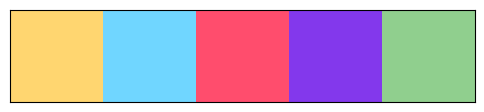

In [12]:
custom_colors = ["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

### creating a heatmap to visualize the missing values in your dataset. The code uses Seaborn's heatmap, and you've defined a custom color palette (custom_colors). 


### This code includes:

- Adjusted the figure size for better proportions.
- Added a title to the subplot for better context.
- Set the custom color palette (cmap) for the heatmap.

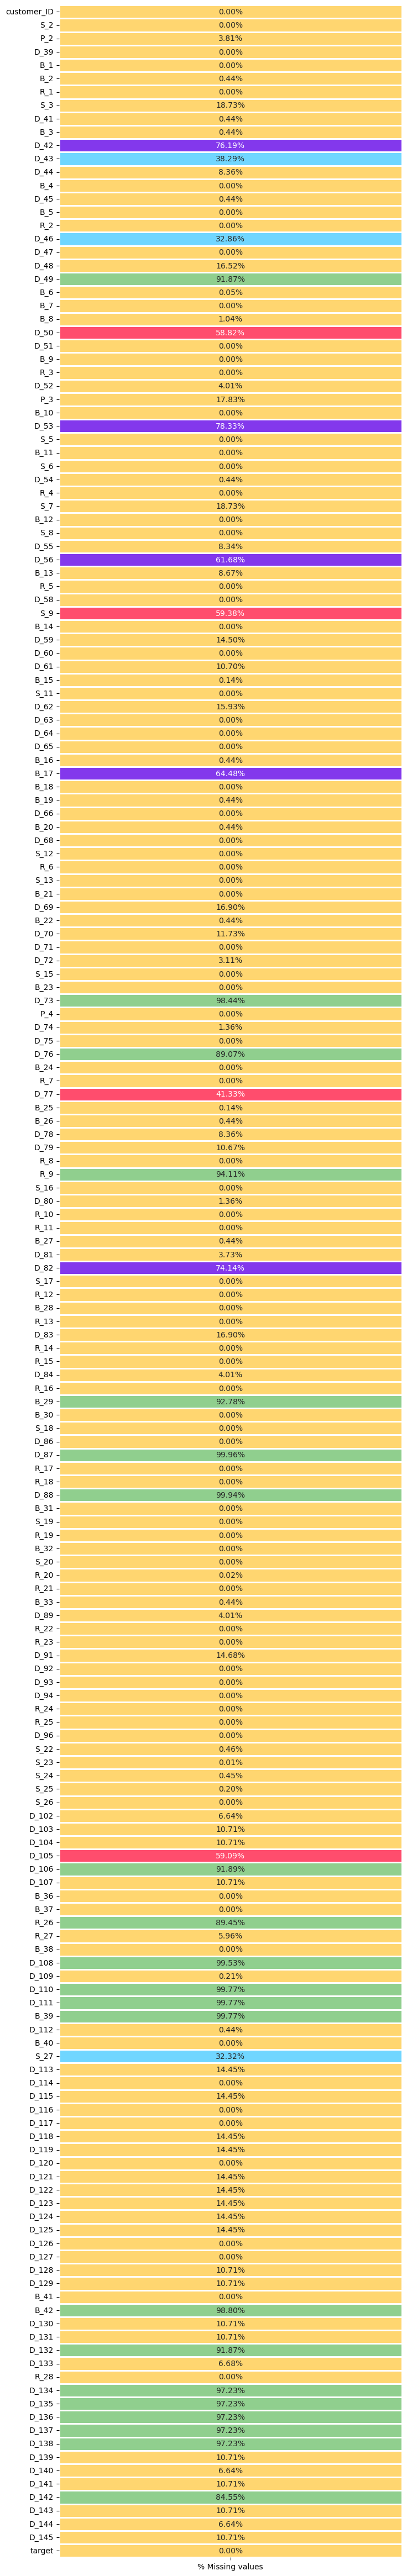

In [13]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = df_train.isnull().sum()/len(df_train))
fig = plt.figure(figsize = (20, 60),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = custom_colors,vmax = 1, ax = ax0)
plt.show()

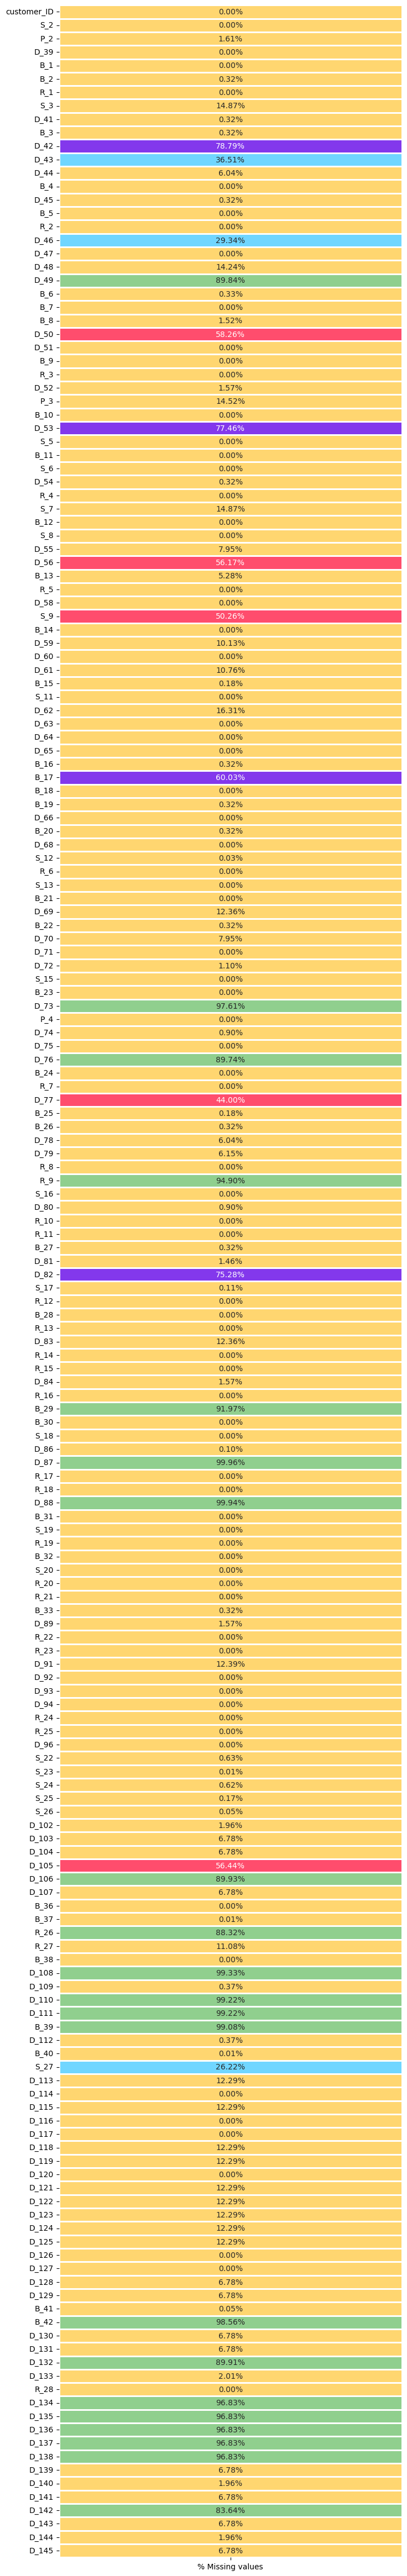

In [14]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = df_test.isnull().sum()/len(df_test))
fig = plt.figure(figsize = (20, 60),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = custom_colors,vmax = 1, ax = ax0)
plt.show()

### Droping and Changing Unnecessary Columns

In [15]:
df_train = df_train.drop('S_2', axis = 1)

In [16]:
df_test = df_test.drop('S_2', axis = 1)

In [17]:
df_train = df_train.groupby('customer_ID').tail(1).set_index('customer_ID')

In [18]:
df_test = df_test.groupby('customer_ID').tail(1).set_index('customer_ID')

In [19]:
threshold = 0.7
df_train = df_train.drop(df_train.columns[df_train.isnull().mean() >= threshold], axis=1)

In [20]:
threshold = 0.7
df_test = df_test.drop(df_test.columns[df_test.isnull().mean() >= threshold], axis=1)

### Filling Missing Values

In [21]:
imputer = SimpleImputer(strategy='mean')
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)

In [22]:
imputer = SimpleImputer(strategy='mean')
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)

In [23]:
df_train

P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0       0.938477  0.001734  0.008728  1.006836  0.009224  0.124023  0.008774   
1       0.929199  0.382812  0.025787  1.002930  0.005516  0.089783  0.001479   
2       0.876465  0.001469  0.001472  0.811035  0.005955  0.219800  0.008400   
3       0.567383  0.268555  0.070312  0.812012  0.004227  0.407471  0.007732   
4       0.937012  0.006573  0.003433  0.818848  0.007244  0.166138  0.008263   
...          ...       ...       ...       ...       ...       ...       ...   
458908  0.859863  0.097717  0.006084  1.000977  0.009377  0.106506  0.008499   
458909  0.863281  0.007328  0.431396  0.030640  0.004704  0.324951  0.004150   
458910  0.793945  0.536133  0.063904  1.008789  0.007622  0.084045  0.252686   
458911  0.856934  0.001748  0.003494  1.005859  0.005692  0.369141  0.008972   
458912  0.999023  0.208130  0.119507  1.009766  0.002409 -0.007298  0.005028   

             B_3      D_43      D_44       B_4      D_45       B_5       R_2  \
0       0.004707  0.147662  0.000630  0.080994  0.708984  0.170654  0.006203   
1       0.005829  0.147662  0.009872  0.021774  0.239502  0.070984  0.008057   
2       0.004826  0.147662  0.001676  0.014824  0.222412  0.005356  0.006790   
3       0.010925  0.006634  0.006508  0.110535  0.056396  0.000228  0.002464   
4       0.005928  0.061951  0.002741  0.072998  0.288574  0.003366  0.000930   
...          ...       ...       ...       ...       ...       ...       ...   
458908  0.007881  0.147662  0.006519  0.041840  0.051117  0.191528  0.006737   
458909  0.303467  0.147662  0.125610  0.250488  0.587891  0.021408  0.008125   
458910  0.003012  0.075745  0.005638  0.038879  0.110413  0.049896  0.009094   
458911  0.095398  0.147662  0.000247  0.132568  0.122009  0.082153  0.001181   
458912  0.055878  0.017792  0.005787  0.083252  0.723633  0.010361  0.005543   

            D_46      D_47      D_48       B_6       B_7       B_8      D_50  \
0       0.358643  0.525391  0.255615  0.063904  0.059418  0.006466  0.148682   
1       0.457764  0.382568  0.059357  0.201538  0.032379  0.007683  0.170827   
2       0.438721  0.318359  0.081665  0.168823  0.029144  0.004513  0.170827   
3       0.471680  0.392334  0.176147  0.080017  0.252441  1.003906  0.341309   
4       0.464111  0.465820  0.141602  0.044373  0.035675  0.005463  0.136230   
...          ...       ...       ...       ...       ...       ...       ...   
458908  0.372559  0.199951  0.011909  0.207275  0.033508  1.001953  0.170827   
458909  0.427979  0.753418  0.162231  0.016068  0.335449  0.006725  0.126953   
458910  0.391113  0.309082  0.035522  0.200317  0.042877  1.003906  0.170288   
458911  0.541016  0.565430  0.363037  0.049225  0.202515  1.002930  0.170827   
458912  0.303467  0.516113  0.002729  0.079102  0.094727  0.007782  0.061798   

            D_51       B_9       R_3      D_52       P_3      B_10       S_5  \
0       1.335938  0.008209  0.001423  0.207275  0.736328  0.096191  0.023376   
1       0.334473  0.007561  0.005550  0.110474  0.619141  0.302734  0.025803   
2       0.004265  0.003664  0.007835  0.200073  0.634766  0.222168  0.007874   
3       0.000695  0.026901  0.006786  0.201782  0.582520  0.297852  0.068359   
4       0.341064  0.005474  0.106018  0.193726  0.560059  0.058777  0.008095   
...          ...       ...       ...       ...       ...       ...       ...   
458908  0.008621  0.013573  0.005802  0.210815  0.814453  0.370605  0.034668   
458909  0.339600  0.224121  0.003777  0.348389  0.649414  0.037628  0.009254   
458910  0.342285  0.111816  0.004627  0.144043  0.681152  0.302002  0.085388   
458911  0.004028  0.007904  0.002926  0.124512  0.513672  0.092163  0.008598   
458912  0.007294  0.078979  0.206543  0.281250  0.862793  0.123840  0.076965   

            B_11       S_6      D_54       R_4       S_7      B_12       S_8  \
0       0.002768  0.008324  1.001953  0.008301  0.161377  0.148315  0.922852   
1       0

In [24]:
df_test

P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0       0.631348  0.001912  0.010727  0.814453  0.007545  0.168701  0.009972   
1       0.894043  0.325684  0.020966  1.001953  0.005123  0.073242  0.005348   
2       0.774414  0.561035  0.031006  1.009766  0.002344  0.165894  0.003447   
3       0.514160  0.412598  0.269775  0.033264  0.005775  0.287109  0.168213   
4       0.286377  0.177246  0.381348  0.072937  0.006969  0.156738  0.006889   
...          ...       ...       ...       ...       ...       ...       ...   
924616  0.641113  0.001145  0.010292  0.812500  0.000690  0.130859  0.000159   
924617  0.471436  0.009720  0.040649  0.535645  0.006355  1.226562  0.007603   
924618  0.245972  0.185791  0.023743  0.816895  0.009514  0.172852  0.325439   
924619  0.559082  0.032501  0.087952  0.122681  0.003515  0.206909  0.008278   
924620  0.423096  0.004795  0.002005  0.819336  0.005058  0.222046  0.007305   

             B_3      D_43      D_44       B_4      D_45       B_5       R_2  \
0       0.002348  0.159302  0.007584  0.116394  0.004482  0.009514  0.005177   
1       0.001596  0.159302  0.009926  0.033844  0.077759  0.034027  0.002661   
2       0.011391  0.101807  0.008362  0.171997  0.041656  0.017334  0.009239   
3       0.960938  0.298828  0.507324  0.378418  0.204224  0.029114  0.007679   
4       0.544922  0.289795  0.257812  0.275391  0.048126  0.024734  0.007427   
...          ...       ...       ...       ...       ...       ...       ...   
924616  0.025681  0.064453  0.005428  0.001790  0.395508  0.008347  0.006939   
924617  0.007572  0.184448  0.128784  0.017593  0.012268  0.018494  0.009689   
924618  0.034210  0.068726  0.505859  0.236938  0.028107  0.024643  0.006836   
924619  0.131714  0.181274  0.132935  0.620605  0.059814  0.015419  0.005062   
924620  0.007805  0.159302  0.001883  0.002775  0.004700  0.006531  0.005608   

            D_46      D_47      D_48       B_6       B_7       B_8      D_50  \
0       0.467529  0.474365  0.626465  0.174561  1.250977  1.003906  0.181274   
1       0.459229  0.340332  0.085876  0.209473  0.029221  1.001953  0.181274   
2       0.568848  0.182007  0.250488  0.230469  0.044159  1.007812  0.181274   
3       0.460205  0.142212  0.604004  0.014305  0.303711  0.007835  0.181274   
4       0.455078  0.021454  0.747559  0.021591  0.208252  1.009766  0.181274   
...          ...       ...       ...       ...       ...       ...       ...   
924616  0.467529  0.661621  0.507812  0.180420  0.001900  0.009087  0.181274   
924617  0.467529  0.083618  0.489502  0.148804  0.042969  1.005859  0.066650   
924618  0.433350  0.323242  0.817871  0.020111  0.220337  1.004883  0.087708   
924619  0.768555  0.525879  0.408447  0.017624  0.508301  1.003906  0.181274   
924620  0.467529  0.646484  0.094543  0.179199  0.103577  1.000977  0.181274   

            D_51       B_9       R_3      D_52       P_3      B_10       S_5  \
0       0.008720  0.001013  0.103577  0.119019  0.609863 -0.002918  0.002771   
1       0.004913  0.023026  0.007557  0.150391  0.588379  0.295166  0.031647   
2       0.006401  0.003626  0.007576  0.198120  0.716797  0.298828  0.031097   
3       0.004585  0.508789  0.500977  0.078003  0.794434  0.013832  0.083435   
4       0.001810  0.591309  0.309814  0.003956  0.543945  0.031143  0.107605   
...          ...       ...       ...       ...       ...       ...       ...   
924616  0.001545  0.006638  0.104553  0.060364  0.757812  0.244629  0.004433   
924617  0.007690  0.386963  1.004883  0.030045  0.443359  0.206421  0.026978   
924618  0.006058  0.008369  0.104736  0.024429  0.405273  0.022552  0.019180   
924619  0.005520  0.028748  0.106750  0.302734  0.375732  0.025436  0.002985   
924620  0.003290  0.006714  0.303223  0.166016  0.609863  0.144531  0.009758   

            B_11       S_6      D_54       R_4       S_7      B_12       S_8  \
0       0.004417  1.006836  1.004883  0.002810  0.105591  0.119202  0.321777   
1       0

### COMBINING THE TRAIN AND TEST DATA

In [25]:
combined = pd.concat([df_train,df_test],ignore_index=True)

In [26]:
combined

P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0        0.938477  0.001734  0.008728  1.006836  0.009224  0.124023  0.008774   
1        0.929199  0.382812  0.025787  1.002930  0.005516  0.089783  0.001479   
2        0.876465  0.001469  0.001472  0.811035  0.005955  0.219800  0.008400   
3        0.567383  0.268555  0.070312  0.812012  0.004227  0.407471  0.007732   
4        0.937012  0.006573  0.003433  0.818848  0.007244  0.166138  0.008263   
...           ...       ...       ...       ...       ...       ...       ...   
1383529  0.641113  0.001145  0.010292  0.812500  0.000690  0.130859  0.000159   
1383530  0.471436  0.009720  0.040649  0.535645  0.006355  1.226562  0.007603   
1383531  0.245972  0.185791  0.023743  0.816895  0.009514  0.172852  0.325439   
1383532  0.559082  0.032501  0.087952  0.122681  0.003515  0.206909  0.008278   
1383533  0.423096  0.004795  0.002005  0.819336  0.005058  0.222046  0.007305   

              B_3      D_43      D_44       B_4      D_45       B_5       R_2  \
0        0.004707  0.147662  0.000630  0.080994  0.708984  0.170654  0.006203   
1        0.005829  0.147662  0.009872  0.021774  0.239502  0.070984  0.008057   
2        0.004826  0.147662  0.001676  0.014824  0.222412  0.005356  0.006790   
3        0.010925  0.006634  0.006508  0.110535  0.056396  0.000228  0.002464   
4        0.005928  0.061951  0.002741  0.072998  0.288574  0.003366  0.000930   
...           ...       ...       ...       ...       ...       ...       ...   
1383529  0.025681  0.064453  0.005428  0.001790  0.395508  0.008347  0.006939   
1383530  0.007572  0.184448  0.128784  0.017593  0.012268  0.018494  0.009689   
1383531  0.034210  0.068726  0.505859  0.236938  0.028107  0.024643  0.006836   
1383532  0.131714  0.181274  0.132935  0.620605  0.059814  0.015419  0.005062   
1383533  0.007805  0.159302  0.001883  0.002775  0.004700  0.006531  0.005608   

             D_46      D_47      D_48       B_6       B_7       B_8      D_50  \
0        0.358643  0.525391  0.255615  0.063904  0.059418  0.006466  0.148682   
1        0.457764  0.382568  0.059357  0.201538  0.032379  0.007683  0.170827   
2        0.438721  0.318359  0.081665  0.168823  0.029144  0.004513  0.170827   
3        0.471680  0.392334  0.176147  0.080017  0.252441  1.003906  0.341309   
4        0.464111  0.465820  0.141602  0.044373  0.035675  0.005463  0.136230   
...           ...       ...       ...       ...       ...       ...       ...   
1383529  0.467529  0.661621  0.507812  0.180420  0.001900  0.009087  0.181274   
1383530  0.467529  0.083618  0.489502  0.148804  0.042969  1.005859  0.066650   
1383531  0.433350  0.323242  0.817871  0.020111  0.220337  1.004883  0.087708   
1383532  0.768555  0.525879  0.408447  0.017624  0.508301  1.003906  0.181274   
1383533  0.467529  0.646484  0.094543  0.179199  0.103577  1.000977  0.181274   

             D_51       B_9       R_3      D_52       P_3      B_10       S_5  \
0        1.335938  0.008209  0.001423  0.207275  0.736328  0.096191  0.023376   
1        0.334473  0.007561  0.005550  0.110474  0.619141  0.302734  0.025803   
2        0.004265  0.003664  0.007835  0.200073  0.634766  0.222168  0.007874   
3        0.000695  0.026901  0.006786  0.201782  0.582520  0.297852  0.068359   
4        0.341064  0.005474  0.106018  0.193726  0.560059  0.058777  0.008095   
...           ...       ...       ...       ...       ...       ...       ...   
1383529  0.001545  0.006638  0.104553  0.060364  0.757812  0.244629  0.004433   
1383530  0.007690  0.386963  1.004883  0.030045  0.443359  0.206421  0.026978   
1383531  0.006058  0.008369  0.104736  0.024429  0.405273  0.022552  0.019180   
1383532  0.005520  0.028748  0.106750  0.302734  0.375732  0.025436  0.002985   
1383533  0.003290  0.006714  0.303223  0.166016  0.609863  0.144531  0.009758   

             B_11       S_6      D_54       R_4       S_7      B_12       S_8  \
0        0.002768  0.008324  1.001953  0.

In [27]:
df_train.shape,df_test.shape,combined.shape

((458913, 165), (924621, 164), (1383534, 165))

- shape of test,train and combined data:((458913, 165), (924621, 164), (1383534, 165))

### Combined data columns

In [28]:
combined.columns

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_131', 'D_133', 'R_28', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=165)

### NULL VALUES IN THE COMBINED DATA

In [29]:
combined.isnull().sum()

P_2            0
D_39           0
B_1            0
B_2            0
R_1            0
           ...  
D_141          0
D_143          0
D_144          0
D_145          0
target    924621
Length: 165, dtype: int64

### AS PER DATA DISCRIPTION THE CATEGORY COLUMNS 

In [30]:
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [31]:
combined_cat = combined[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]

### A code snippet that iterates over columns in a DataFrame (combined_cat) and prints unique values and their counts for each column. This can be helpful for exploring the unique values and distribution of categorical variables in your dataset.

In [32]:
for i in combined_cat.columns:
    print(i)
    print(combined_cat[i].unique())
    print(combined_cat[i].value_counts())
    print('\n')

B_30
[ 0.  1.  2. -1.]
B_30
 0.0    1211961
 1.0     155219
 2.0      11422
-1.0       4932
Name: count, dtype: int64


B_38
[ 2.  1.  3.  5.  4.  6.  7. -1.]
B_38
 2.0    469255
 1.0    376848
 3.0    291211
 5.0     92189
 7.0     61037
 4.0     54949
 6.0     33113
-1.0      4932
Name: count, dtype: int64


D_114
[ 1.  0. -1.]
D_114
 1.0    748247
 0.0    455366
-1.0    179921
Name: count, dtype: int64


D_116
[ 0. -1.  1.]
D_116
 0.0    1201321
-1.0     179921
 1.0       2292
Name: count, dtype: int64


D_117
[ 4. -1.  2.  6.  3.  5.  1.]
D_117
-1.0    505869
 4.0    260493
 3.0    259083
 2.0    145356
 5.0    105130
 6.0     80996
 1.0     26607
Name: count, dtype: int64


D_120
[ 0. -1.  1.]
D_120
 0.0    1011025
 1.0     192588
-1.0     179921
Name: count, dtype: int64


D_126
[ 1. -1.  0.]
D_126
 1.0    961183
 0.0    278311
-1.0    144040
Name: count, dtype: int64


D_63
[0. 1. 2. 3. 4. 5.]
D_63
1.0    1036036
0.0     225763
2.0      99164
3.0      13578
4.0       6451
5.0   

### We using a loop to create count plots for each categorical column in the combined_cat DataFrame using the Seaborn library. This can be a useful way to visualize the distribution of each categorical variable.

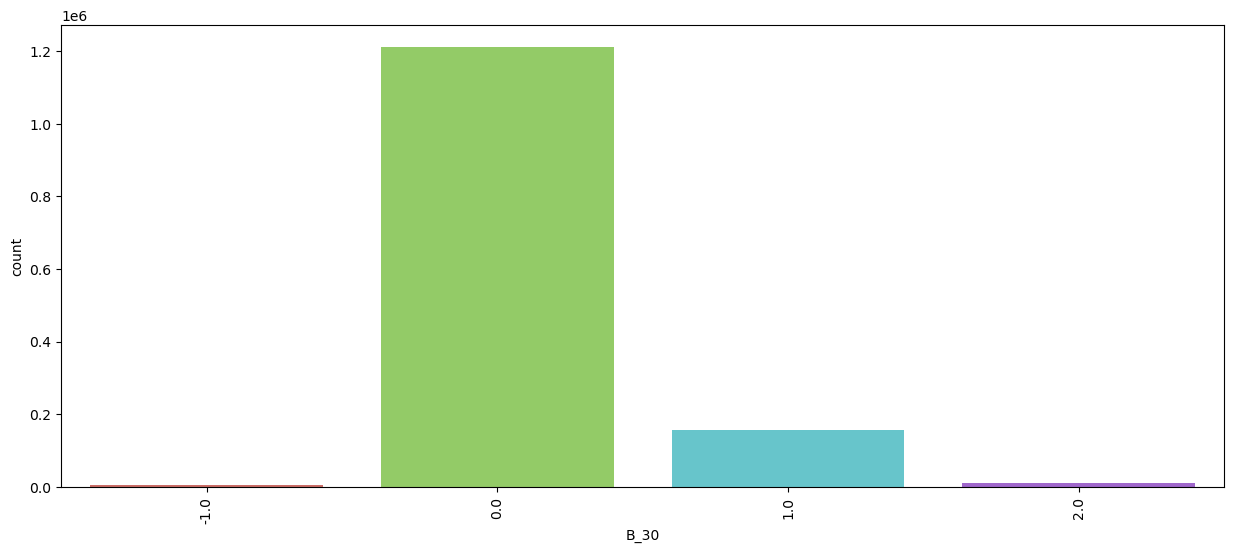

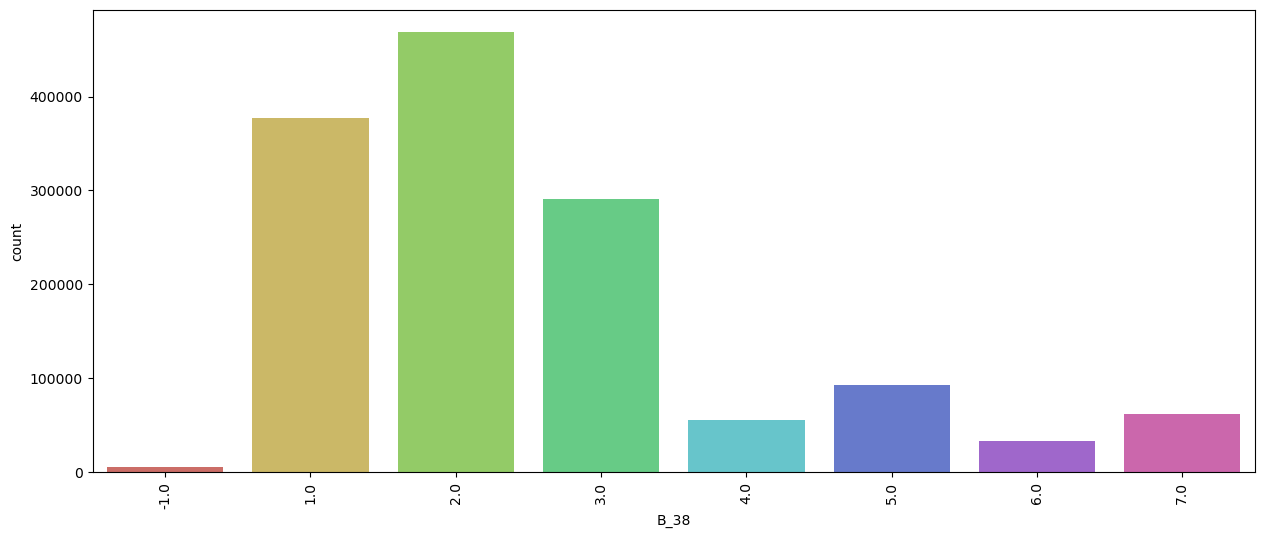

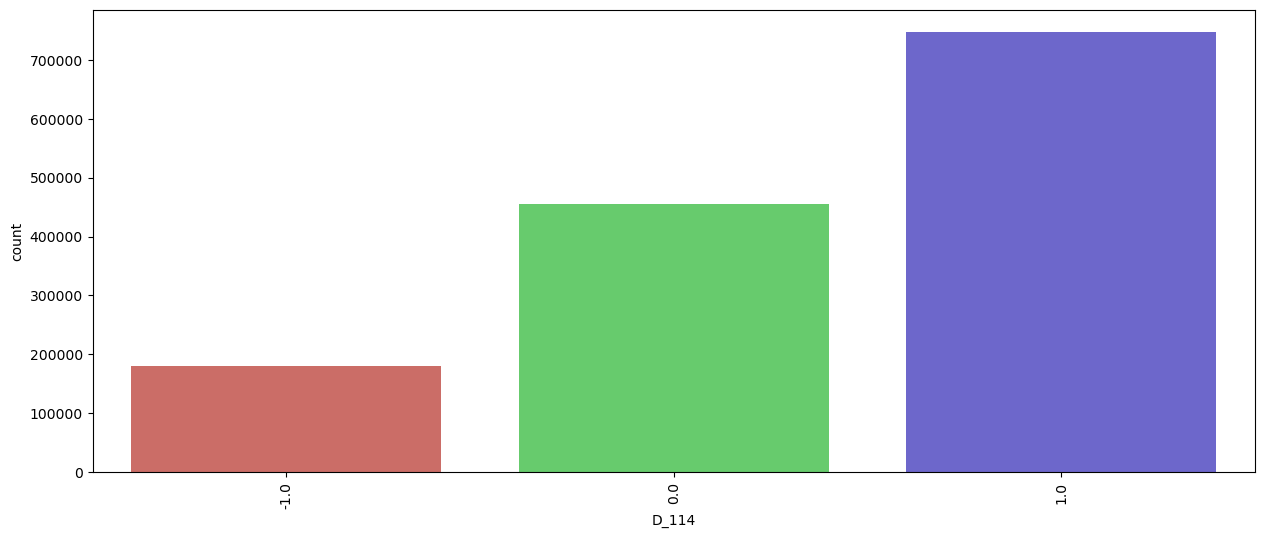

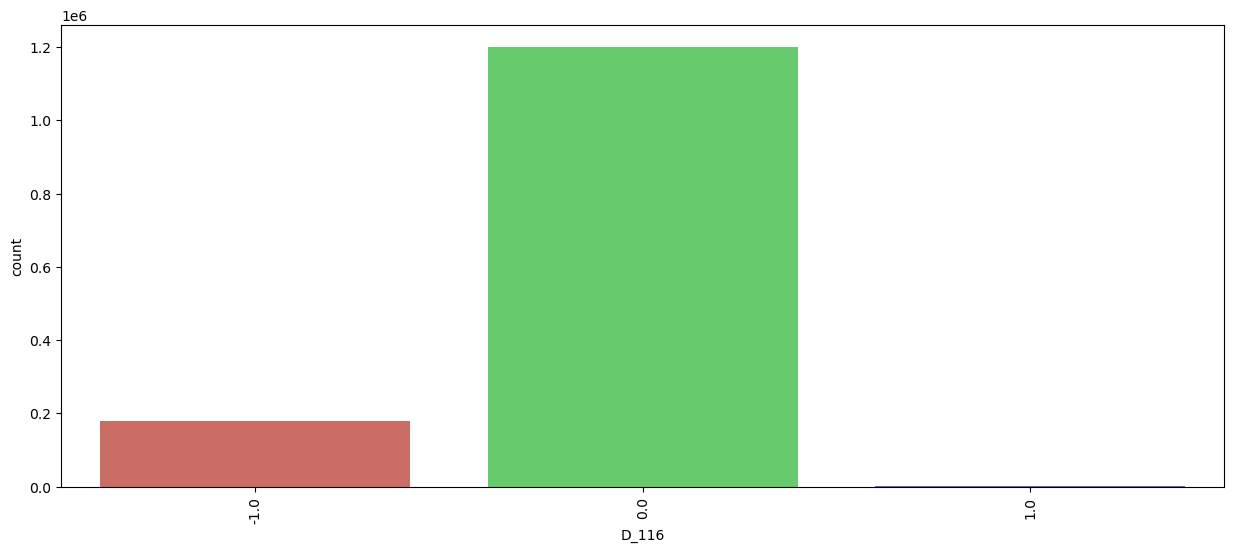

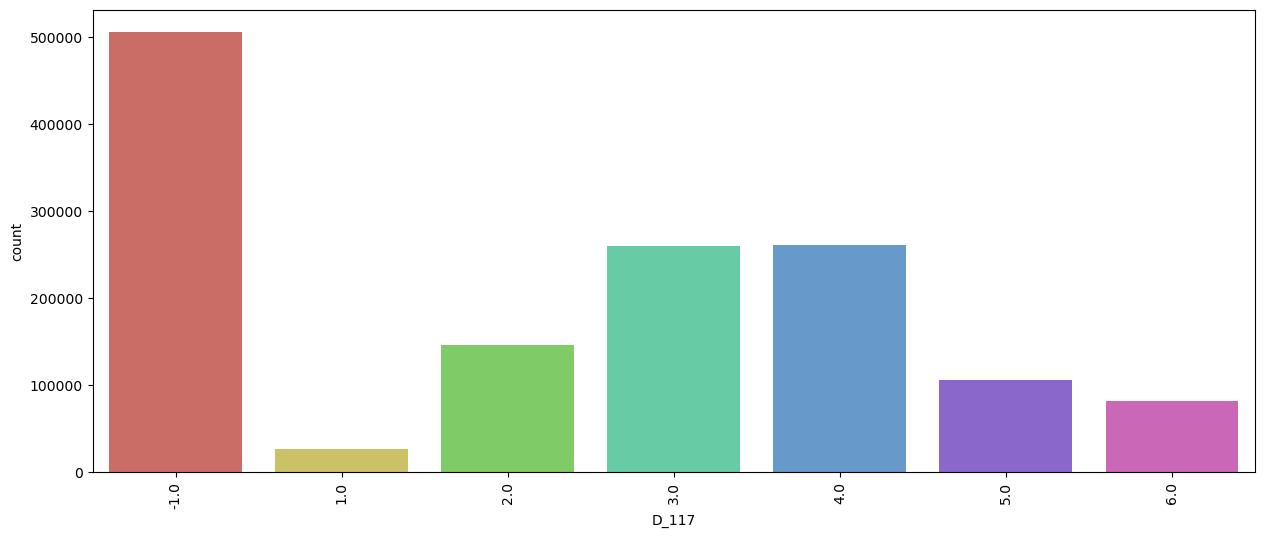

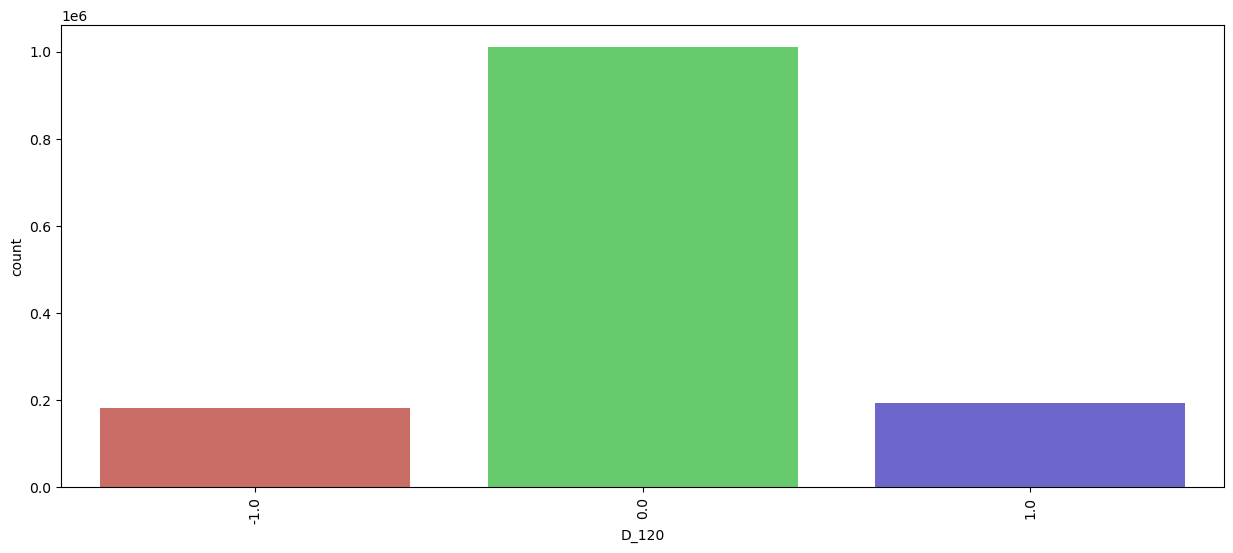

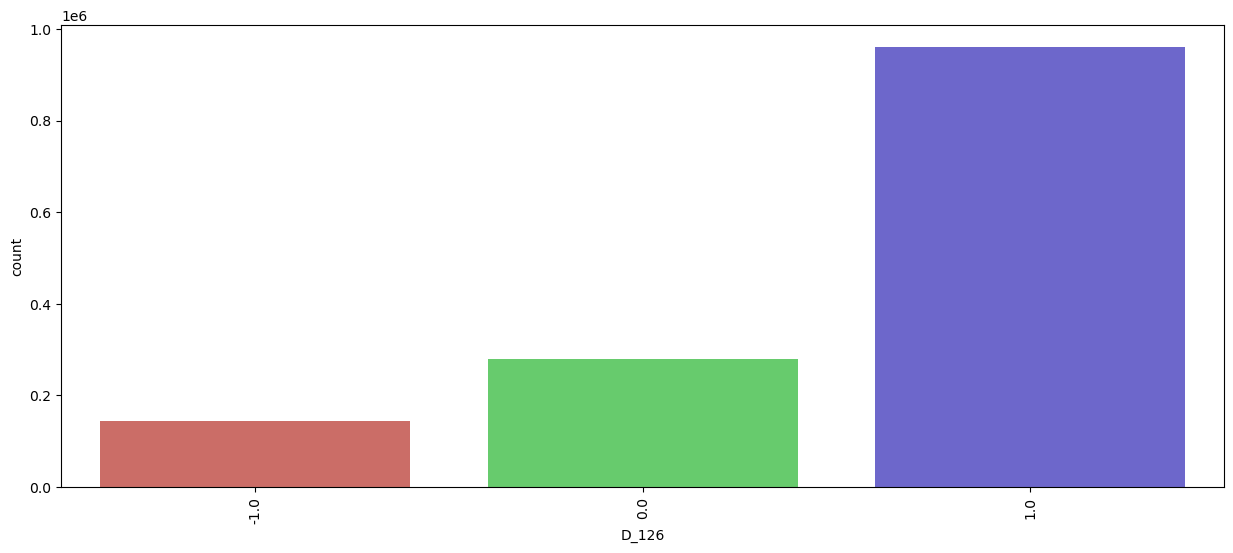

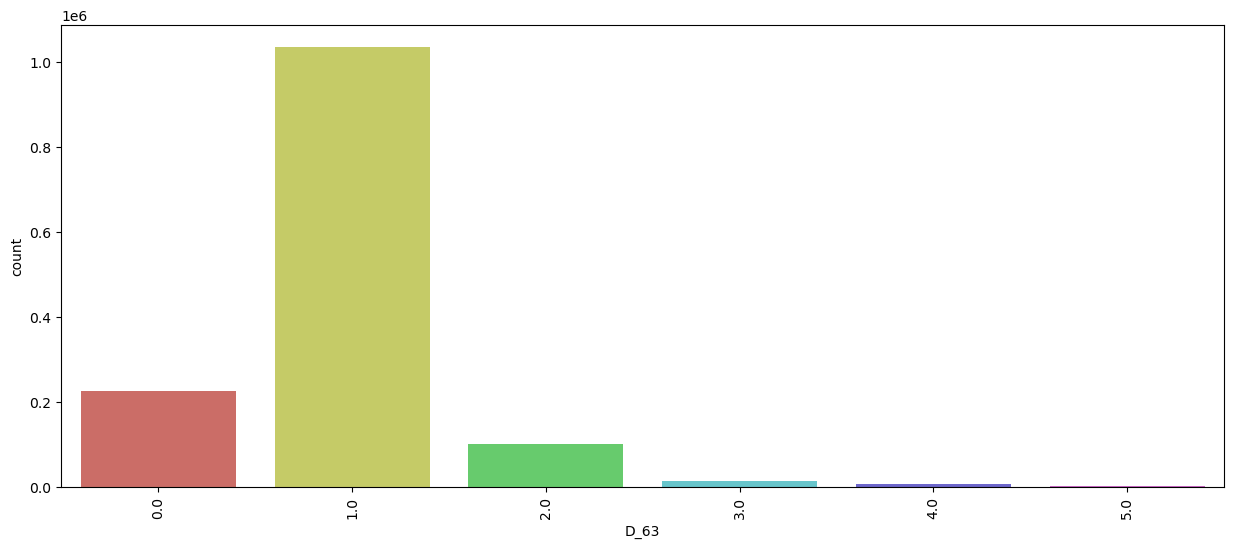

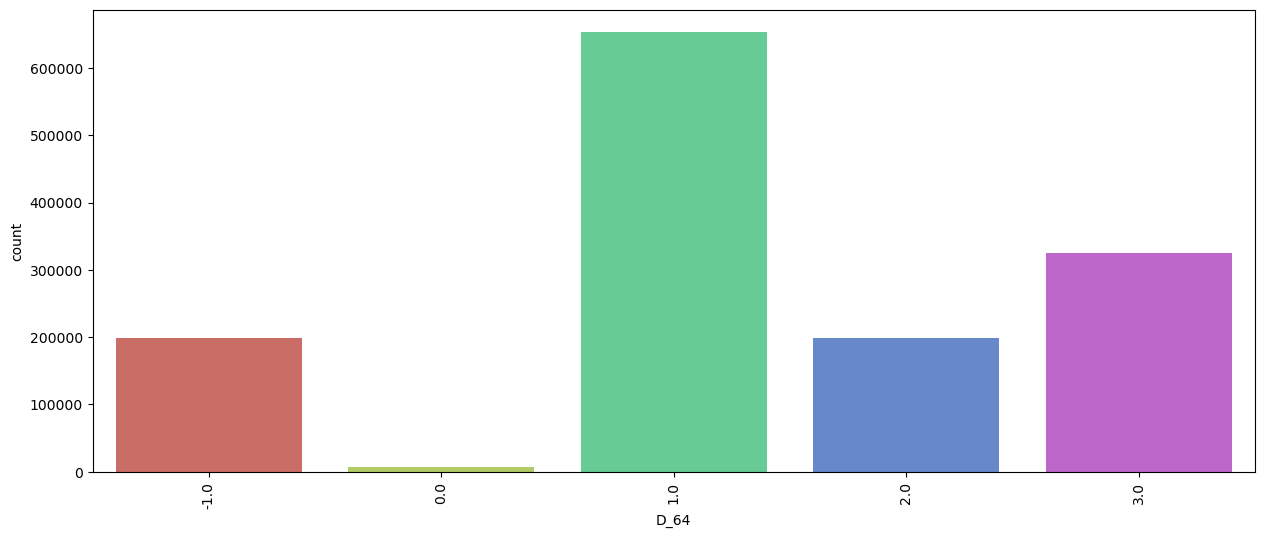

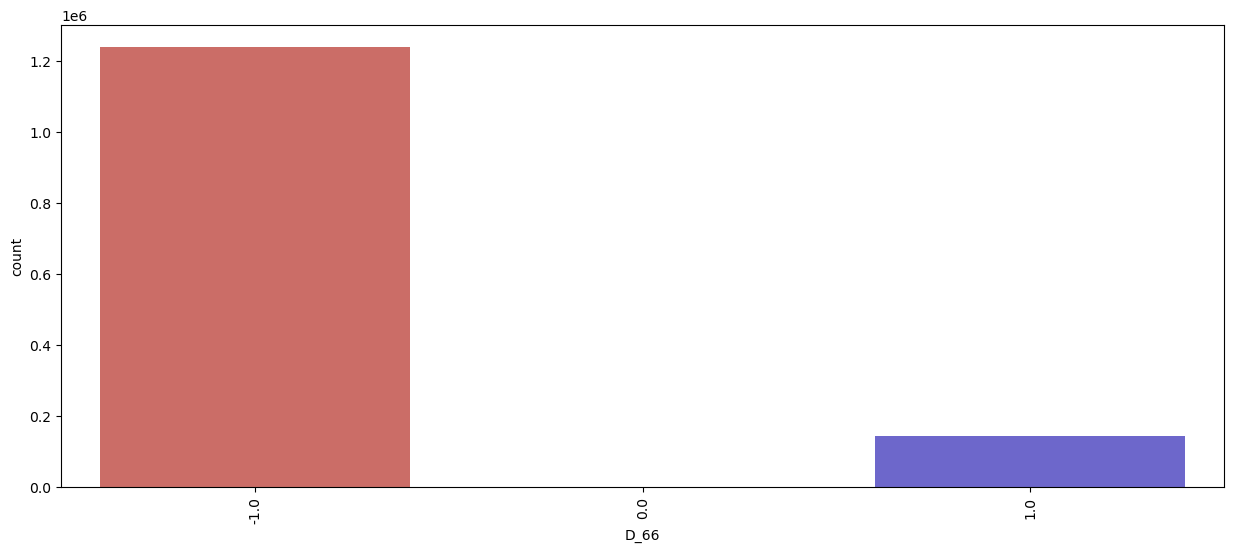

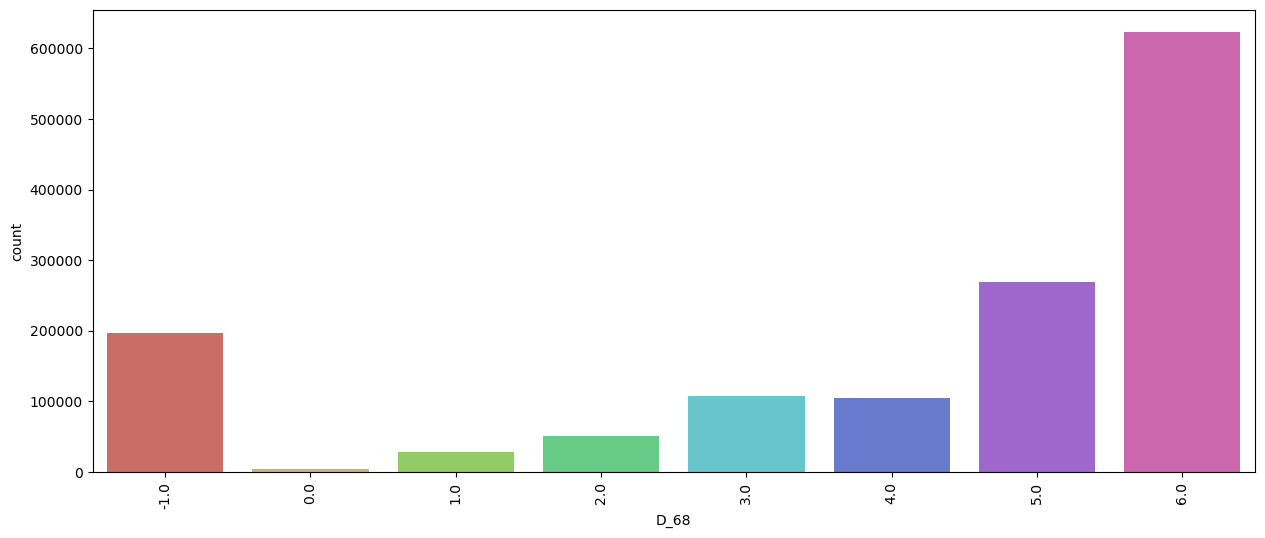

In [33]:
for i in combined_cat.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(x=i,data=combined_cat,palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

### creating pie charts for each categorical column in the combined_cat DataFrame. Pie charts can be useful for showing the proportion of each category within a variable.

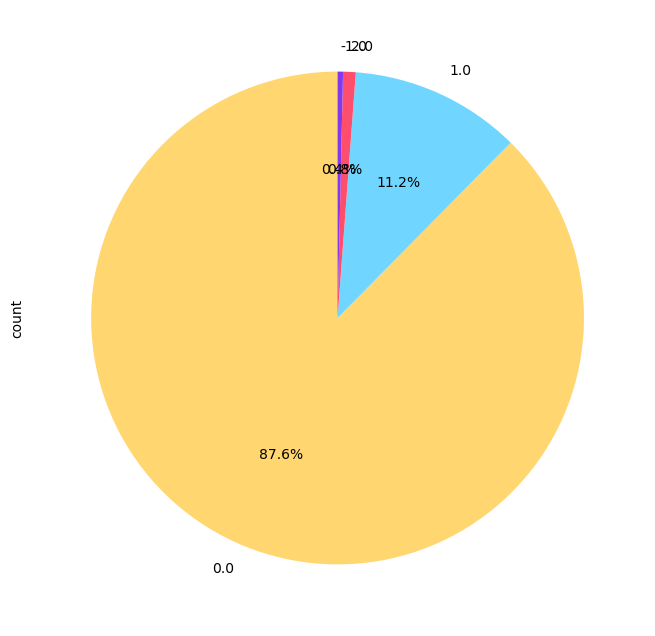

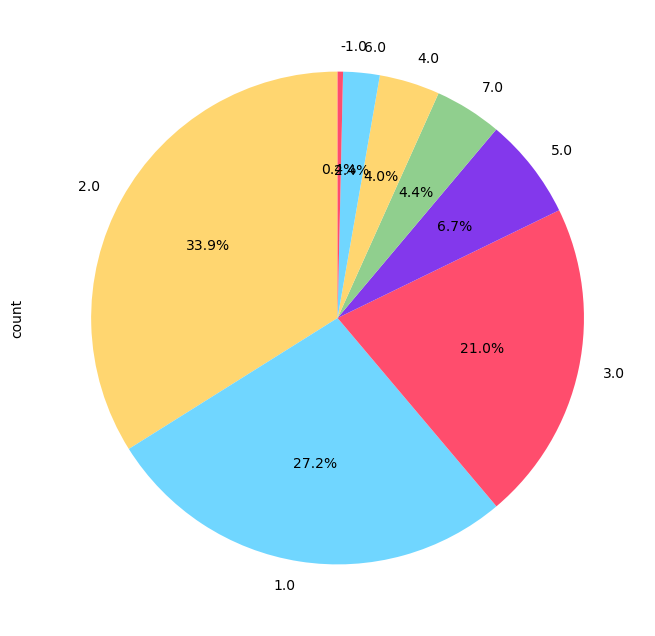

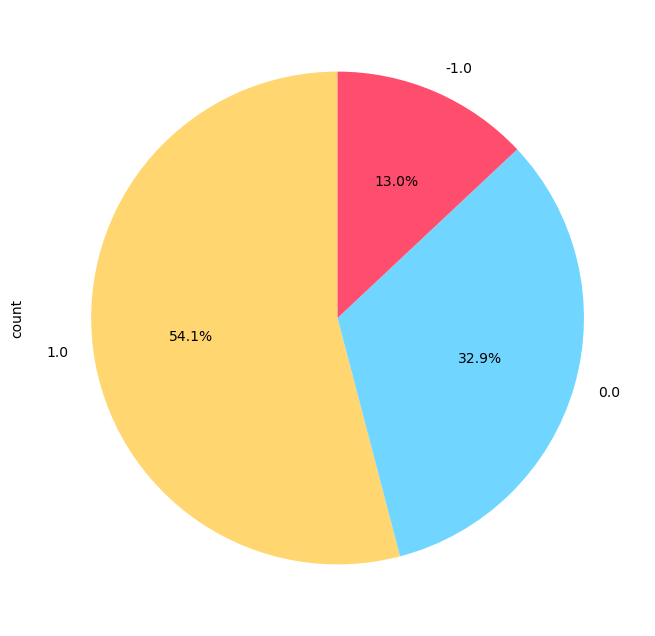

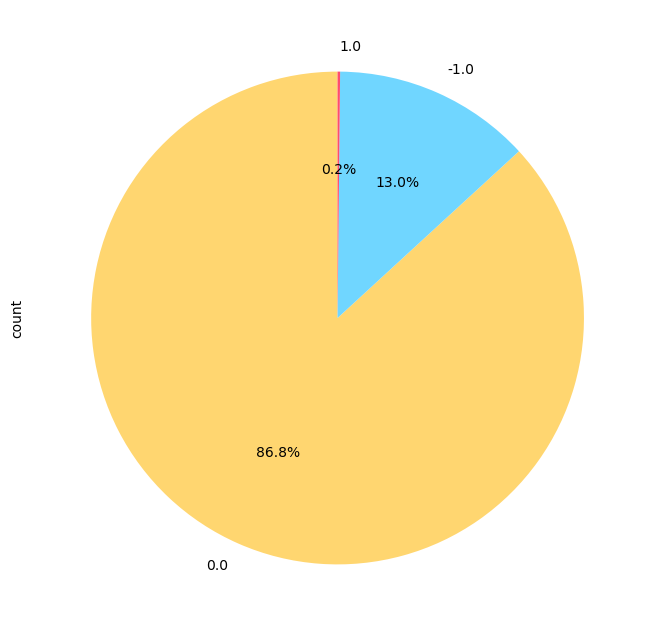

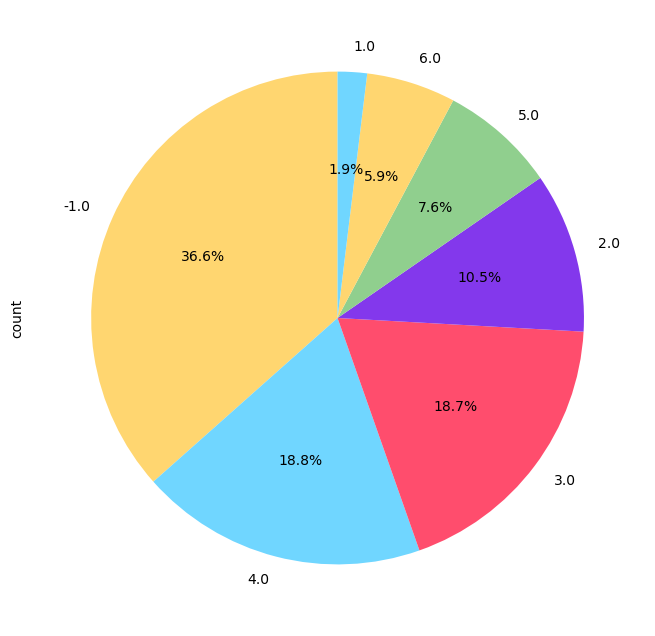

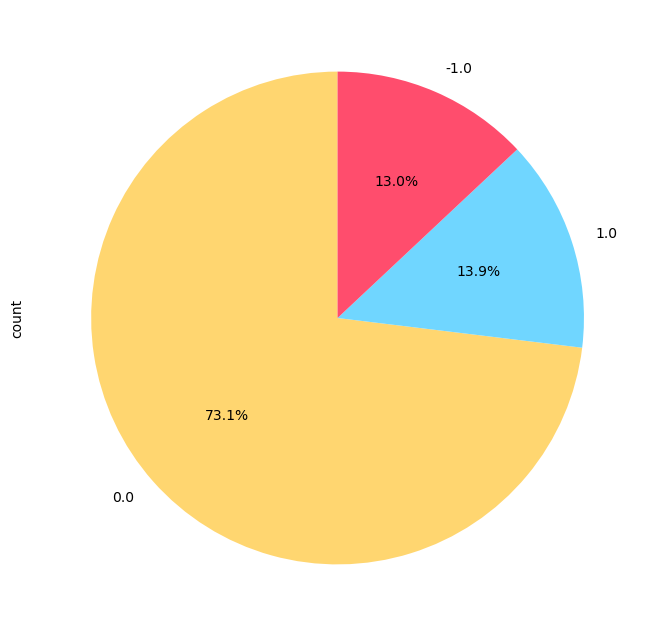

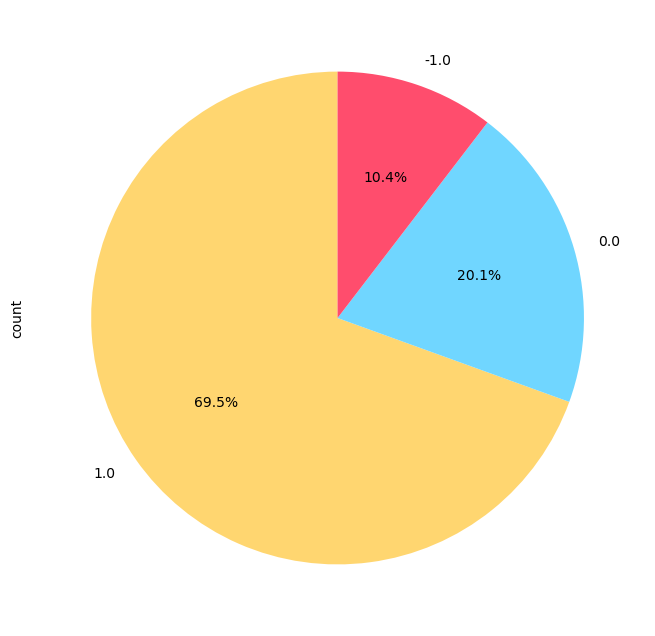

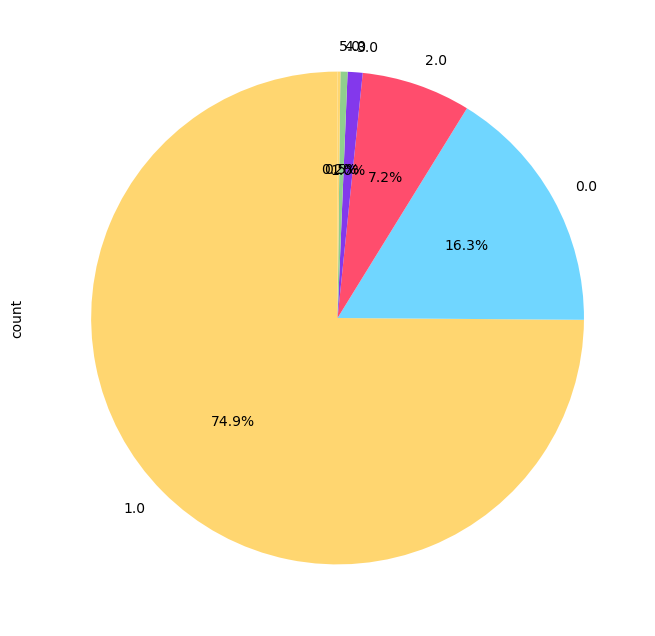

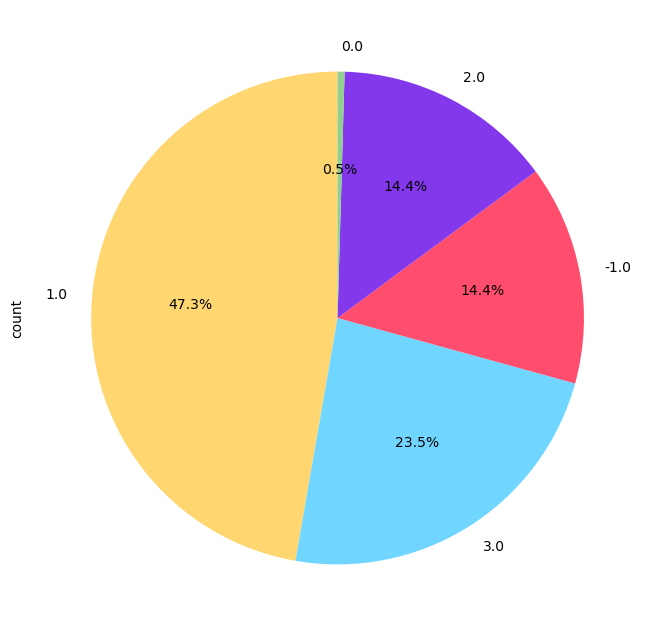

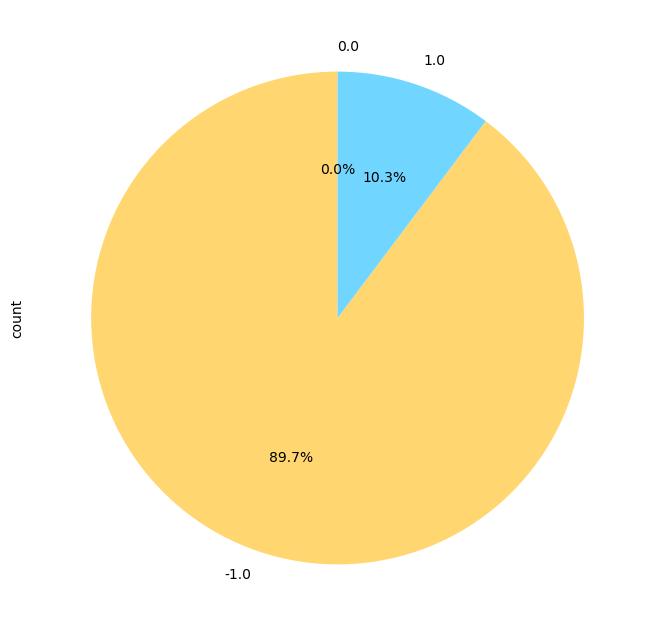

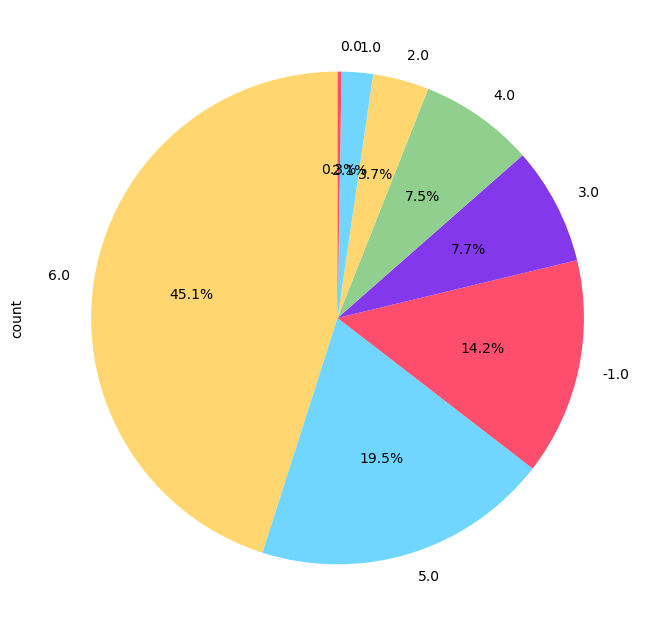

In [34]:
for i in combined_cat.columns:
    plt.figure(figsize=(12,8))
    combined_cat[i].value_counts().plot(kind = 'pie',autopct='%1.1f%%', startangle=90)
    plt.xticks(rotation = 90)
    plt.show()

### creating lists of column names based on certain prefixes in your DataFrame. The code the  generates lists for columns related to delinquency, spending, payment, balance, and risk based on specific prefixes ('D_', 'S_', 'P_', 'B_', 'R_').

In [35]:
feat_Delinquency = [c for c in combined.columns if c.startswith('D_')]
feat_Spend = [c for c in combined.columns if c.startswith('S_')]
feat_Payment = [c for c in combined.columns if c.startswith('P_')]
feat_Balance = [c for c in combined.columns if c.startswith('B_')]
feat_Risk = [c for c in combined.columns if c.startswith('R_')]

#### Printing the total number of variables in each category based on the lists  created.

In [36]:
print(f'Total number of Delinquency variables: {len(feat_Delinquency)}')
print(f'Total number of Spend variables: {len(feat_Spend)}')
print(f'Total number of Payment variables: {len(feat_Payment)}')
print(f'Total number of Balance variables: {len(feat_Balance)}')
print(f'Total number of Risk variables: {len(feat_Risk)}')

Total number of Delinquency variables: 77
Total number of Spend variables: 21
Total number of Payment variables: 3
Total number of Balance variables: 37
Total number of Risk variables: 26


#### Creating lists labels and values to store the categories and their corresponding counts. 

In [37]:
labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(feat_Delinquency), len(feat_Spend),len(feat_Payment), len(feat_Balance),len(feat_Risk)]

### IMPORT FEW MORE ESSENTIAL LIBERARIES

In [38]:
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle

### Using the plotly.graph_objects library to create a pie chart (go.Pie) for the distribution of features. 

In [39]:
fig_1 = go.Figure()
fig_1.add_trace(go.Pie(values = values,labels = labels,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig_1.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#70d6ff","#ff9770"]),
                  title = dict(text = 'Feature Distribution'))  
fig_1.show()

In [40]:
combined['target'].value_counts()

target
0.0    340085
1.0    118828
Name: count, dtype: int64

### Using Seaborn to create a count plot for a target variable in your DataFrame 'combined'. The 'target' variable is typically used in classification problems, and this plot helps visualize the distribution of classes.

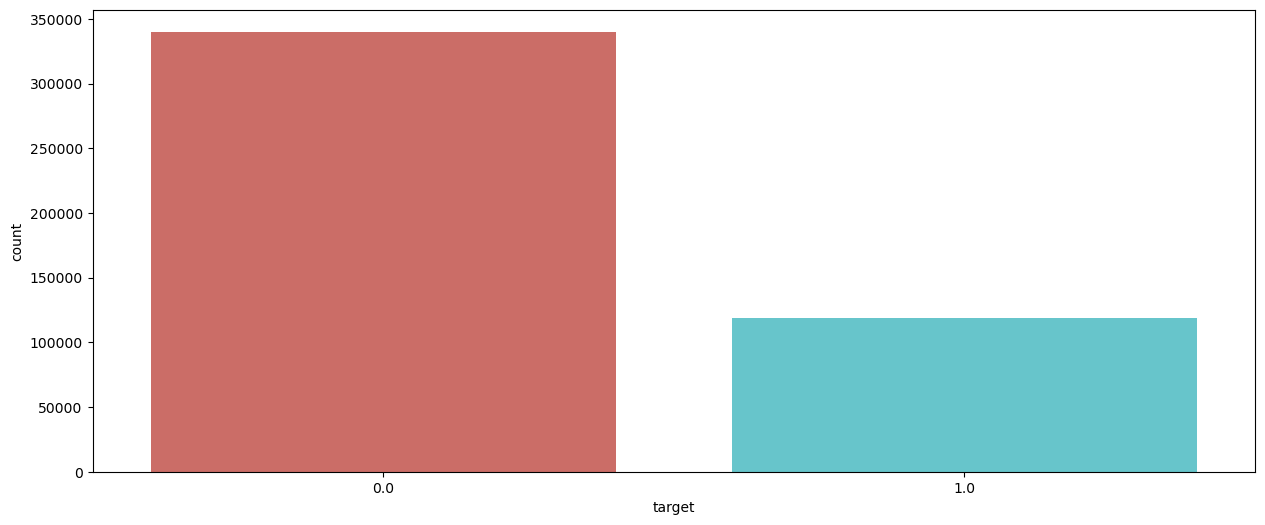

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(x='target', data = combined, palette = 'hls')
plt.xticks()
plt.show()

### Code is creating a pie chart to visualize the distribution of the 'target' variable in your DataFrame 'combined'. 

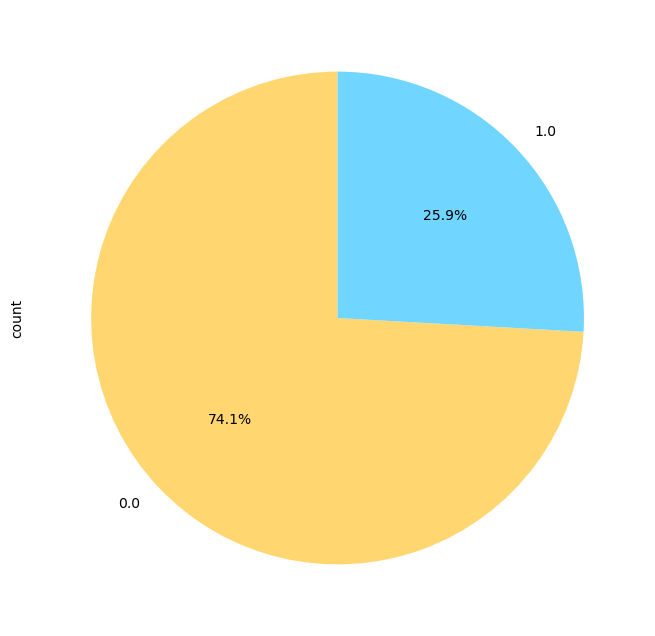

In [42]:
plt.figure(figsize=(20,8))
combined['target'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', startangle=90)
plt.xticks()
plt.show()

### Creating a DataFrame target_class to store the count and percentage of each class in the 'target' variable. This can be useful for analyzing the distribution of your target variable.

In [43]:
target_class = pd.DataFrame({'count': combined.target.value_counts(),
                             'percentage': combined['target'].value_counts() / combined.shape[0] * 100
})

### THE PERCENTAGE FOR EACH CATEGORY

In [44]:
target_class

count  percentage
target                    
0.0     340085   24.580892
1.0     118828    8.588730

### Using the plotly.graph_objects library to create a pie chart for the distribution of the target variable.

In [45]:
fig = go.Figure()
fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#90cf8e","#ff70a6"]),
                  title = dict(text = 'Target Distribution'))  
fig.show()

### The gc module in Python stands for garbage collection. It provides an interface for garbage collection and memory management. The gc module allows you to manually control the garbage collector and perform memory management tasks.

- When you use the gc module, you're typically dealing with memory management, especially in situations where you want to explicitly release memory or perform other garbage collection-related operations.

In [46]:
import gc

In [47]:
gc.collect()

4704

###  creating subsets of your DataFrame combined based on specific conditions. Here's a brief summary of what each block of code is doing:

- del_cols: Creating a subset of columns that start with 'D' or 't' and are not categorical columns.
- spd_cols: Creating a subset of columns that start with 'S' or 't' and are not categorical columns.
- pay_cols: Creating a subset of columns that start with 'P' or 't' and are not categorical columns.
- bal_cols: Creating a subset of columns that start with 'B' or 't' and are not categorical columns.
- ris_cols: Creating a subset of columns that start with 'R' or 't' and are not categorical columns.

These blocks of code are essentially filtering columns based on specific prefixes ('D', 'S', 'P', 'B', 'R' or 't') and excluding those that are categorical columns (cat_cols).

In [48]:
del_cols = [c for c in combined.columns if (c.startswith(('D','t'))) & (c not in cat_cols)]
df_del = combined[del_cols]
spd_cols = [c for c in combined.columns if (c.startswith(('S','t'))) & (c not in cat_cols)]
df_spd = combined[spd_cols]
pay_cols = [c for c in combined.columns if (c.startswith(('P','t'))) & (c not in cat_cols)]
df_pay = combined[pay_cols]
bal_cols = [c for c in combined.columns if (c.startswith(('B','t'))) & (c not in cat_cols)]
df_bal = combined[bal_cols]
ris_cols = [c for c in combined.columns if (c.startswith(('R','t'))) & (c not in cat_cols)]
df_ris = combined[ris_cols]

### Create subplots to visualize the distribution of Delinquency variables based on the 'target' variable using Kernel Density Estimation (KDE) plots.

In [49]:
fig, axes = plt.subplots(29, 3, figsize=(35, 150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(del_cols):
        sns.kdeplot(x=del_cols[i], hue='target', data=df_del, fill=True, ax=ax, palette=["#e63946", "#8338ec"])
        ax.tick_params(axis='x', labelrotation=45)  
        ax.set_xlabel(del_cols[i])  
        ax.set_ylabel('')

fig.suptitle('Distribution of Delinquency Variables', fontsize=35, x=0.5, y=1)
plt.tight_layout()
plt.show()

### The Code generates a heatmap to visualize the correlation matrix of the Delinquency variables in the DataFrame df_del.

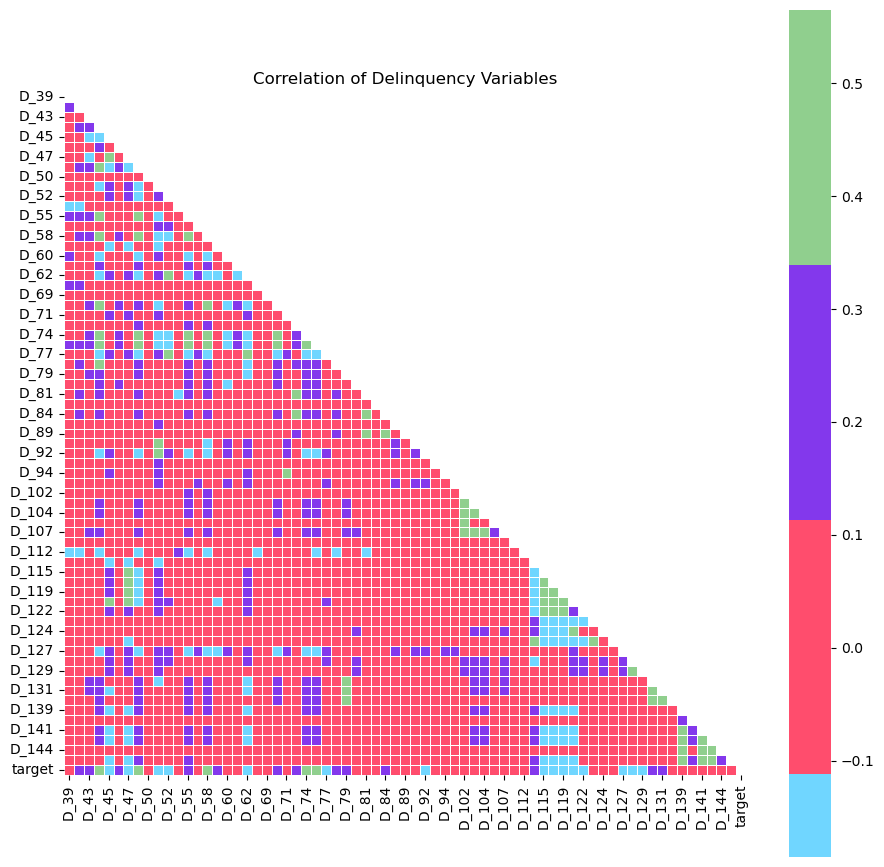

In [50]:
plt.figure(figsize =(11,11))
corr = df_del.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Delinquency Variables')
plt.show()

### Code  create subplots to visualize the distribution of Spend variables based on the 'target' variable using Kernel Density Estimation (KDE) plots.

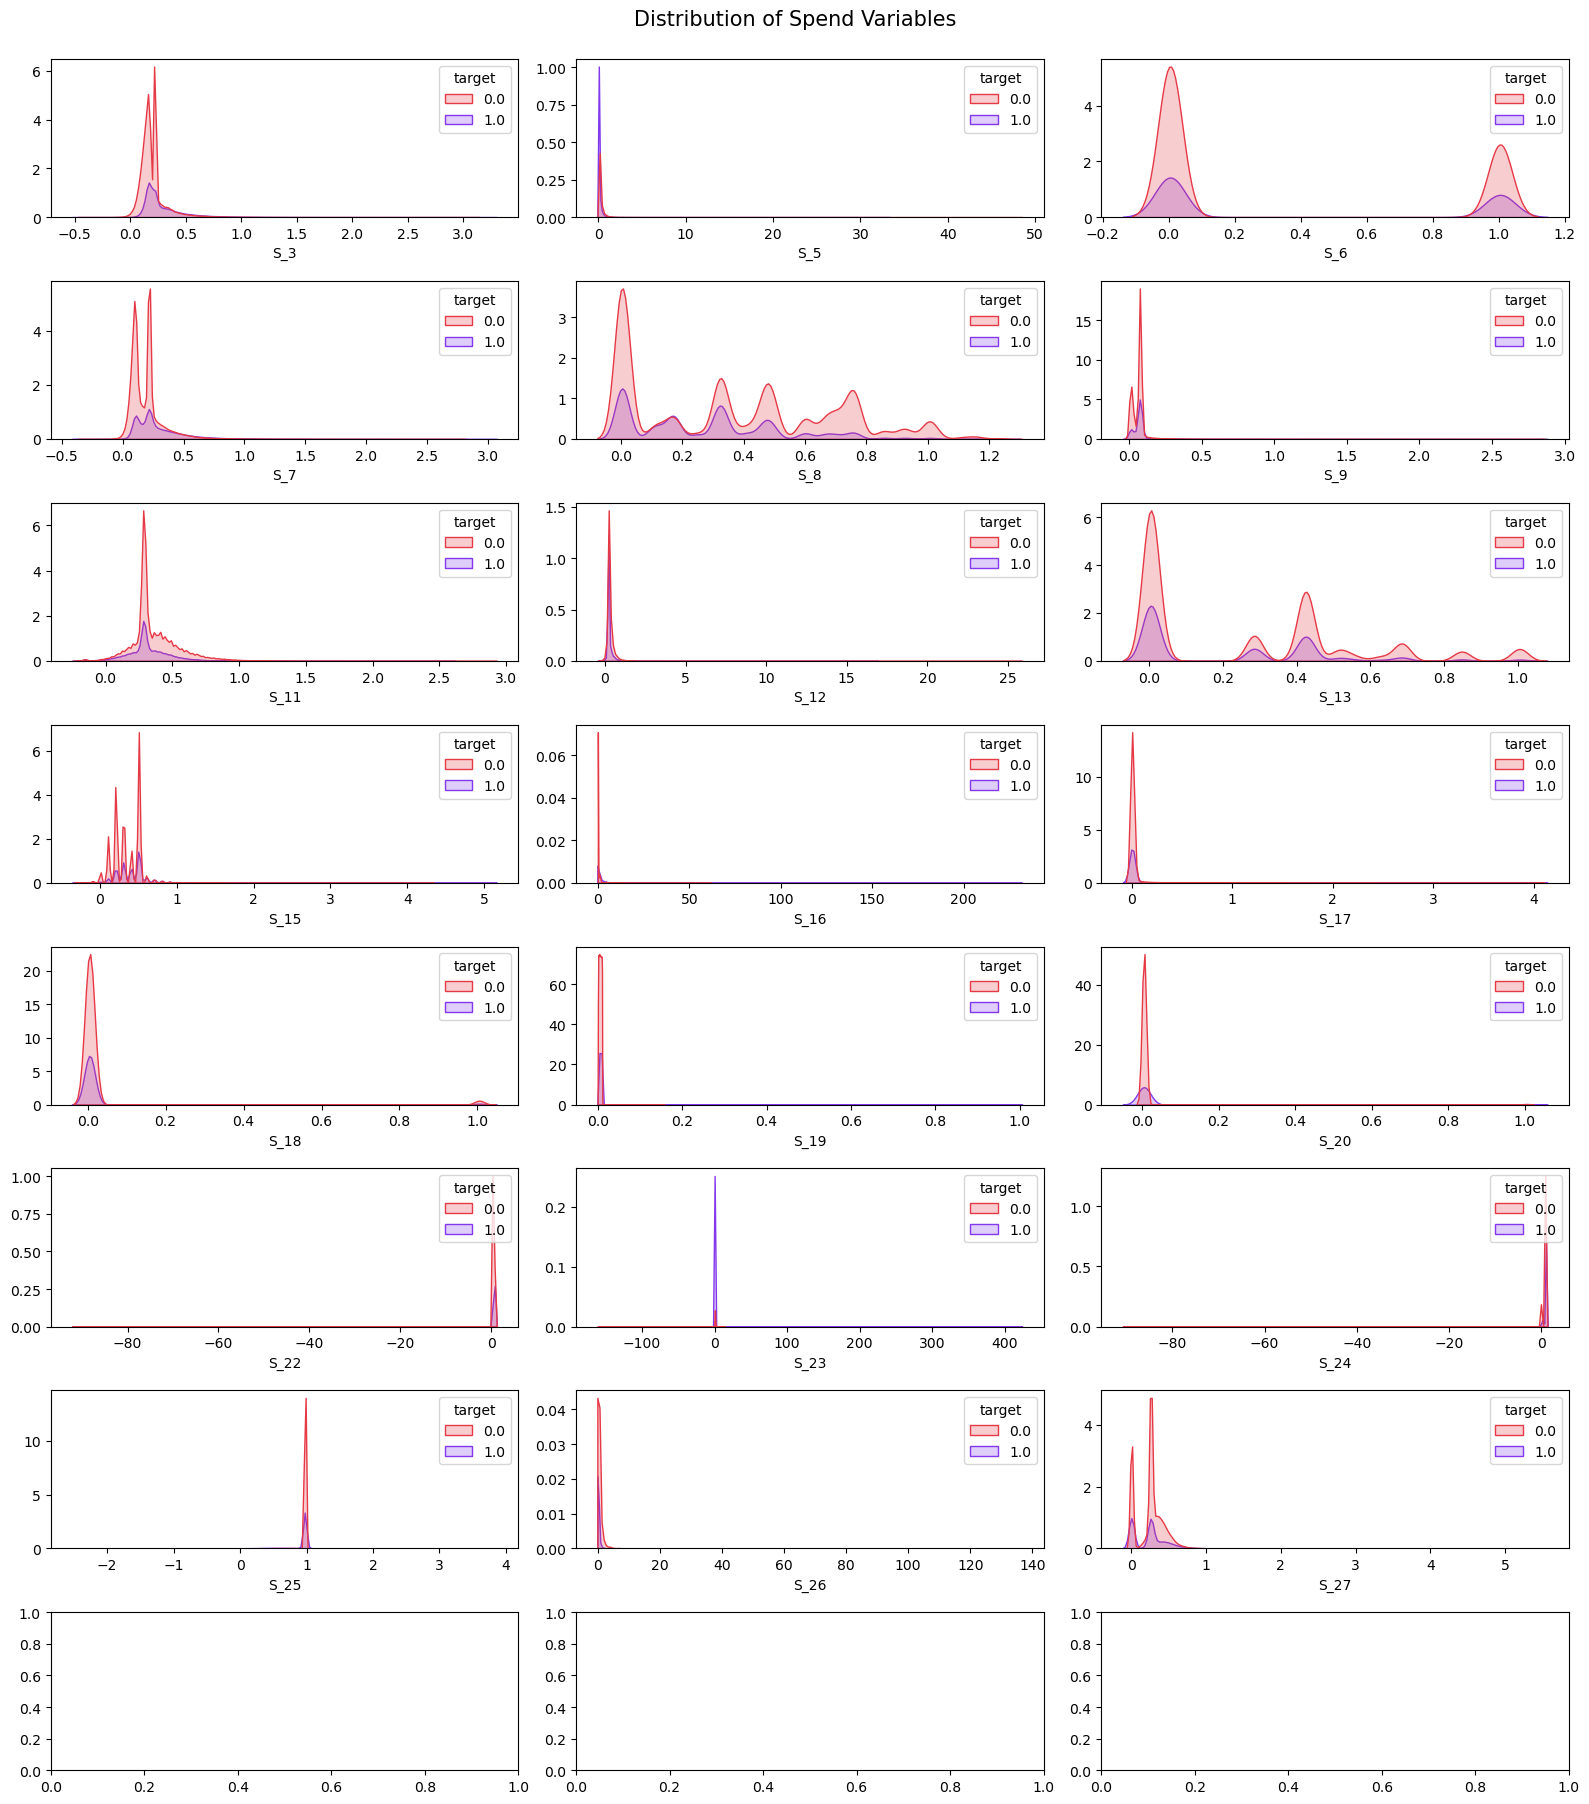

In [51]:
fig, axes = plt.subplots(8, 3, figsize = (16,18))
fig.suptitle('Distribution of Spend Variables', fontsize = 15, x = 0.5, y = 1)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(spd_cols) - 1:
        sns.kdeplot(x = spd_cols[i], hue ='target', data = df_spd, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

### Creating a subset of your DataFrame combined by selecting columns that start with the prefix 'S'.

In [52]:
S_cols = [c for c in combined.columns if (c.startswith(('S')))]
df_S = combined[S_cols]

### Code generates a heatmap to visualize the correlation matrix of the Spend variables in the DataFrame df_S.

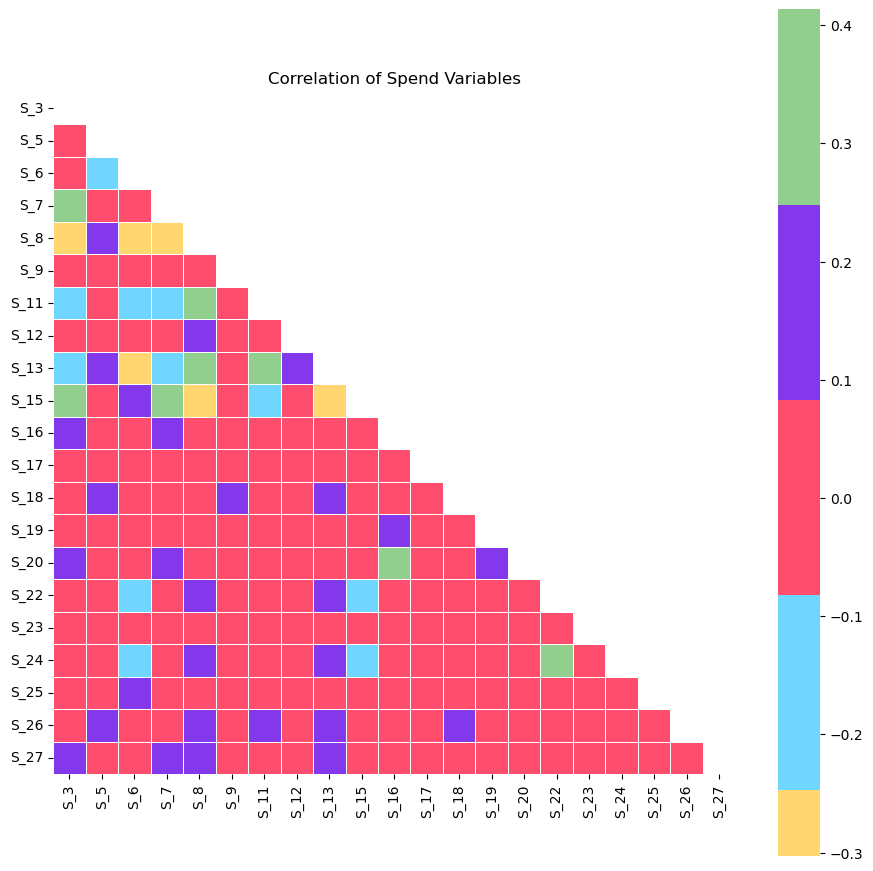

In [53]:
plt.figure(figsize = (11,11))
corr = df_S.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths = .6, cmap = custom_colors)
plt.title('Correlation of Spend Variables')
plt.show()

### creating subplots to visualize the distribution of Payment variables based on the 'target' variable using Kernel Density Estimation (KDE) plots.

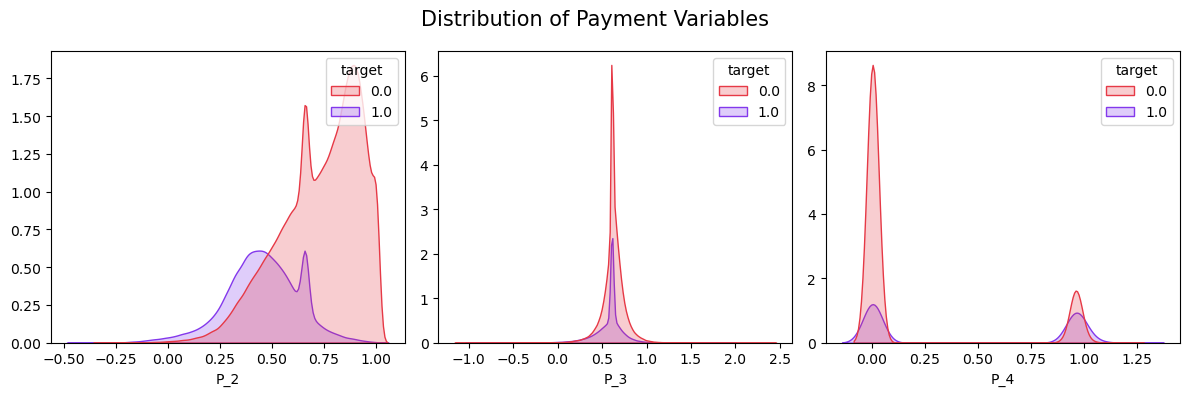

In [58]:
fig, axes = plt.subplots(1, 3, figsize = (12,4))
fig.suptitle('Distribution of Payment Variables',fontsize = 15)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(pay_cols) - 1:
        sns.kdeplot(x = pay_cols[i], hue ='target', data = df_pay, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

### Creating a subset of your DataFrame combined by selecting columns that start with the prefix 'P'. 

In [59]:
P_cols = [c for c in combined.columns if (c.startswith(('P')))]
df_P = combined[P_cols]

### Code generates a heatmap to visualize the correlation matrix of the Payment variables in the DataFrame df_P.

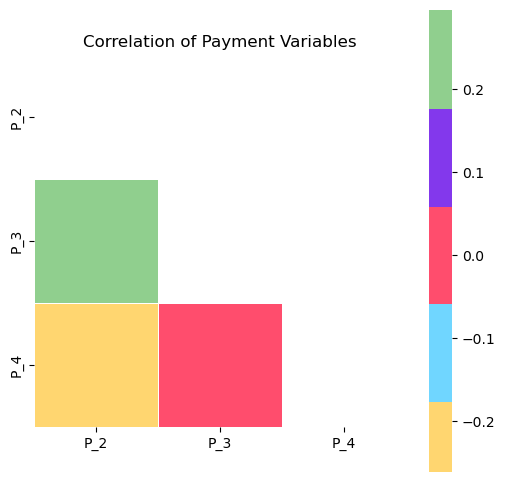

In [60]:
plt.figure(figsize = (6,6))
corr = df_P.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths = .6, cmap = custom_colors)
plt.title('Correlation of Payment Variables')
plt.show()

### Code creates subplots to visualize the distribution of Balance variables based on the 'target' variable using Kernel Density Estimation (KDE) plots.

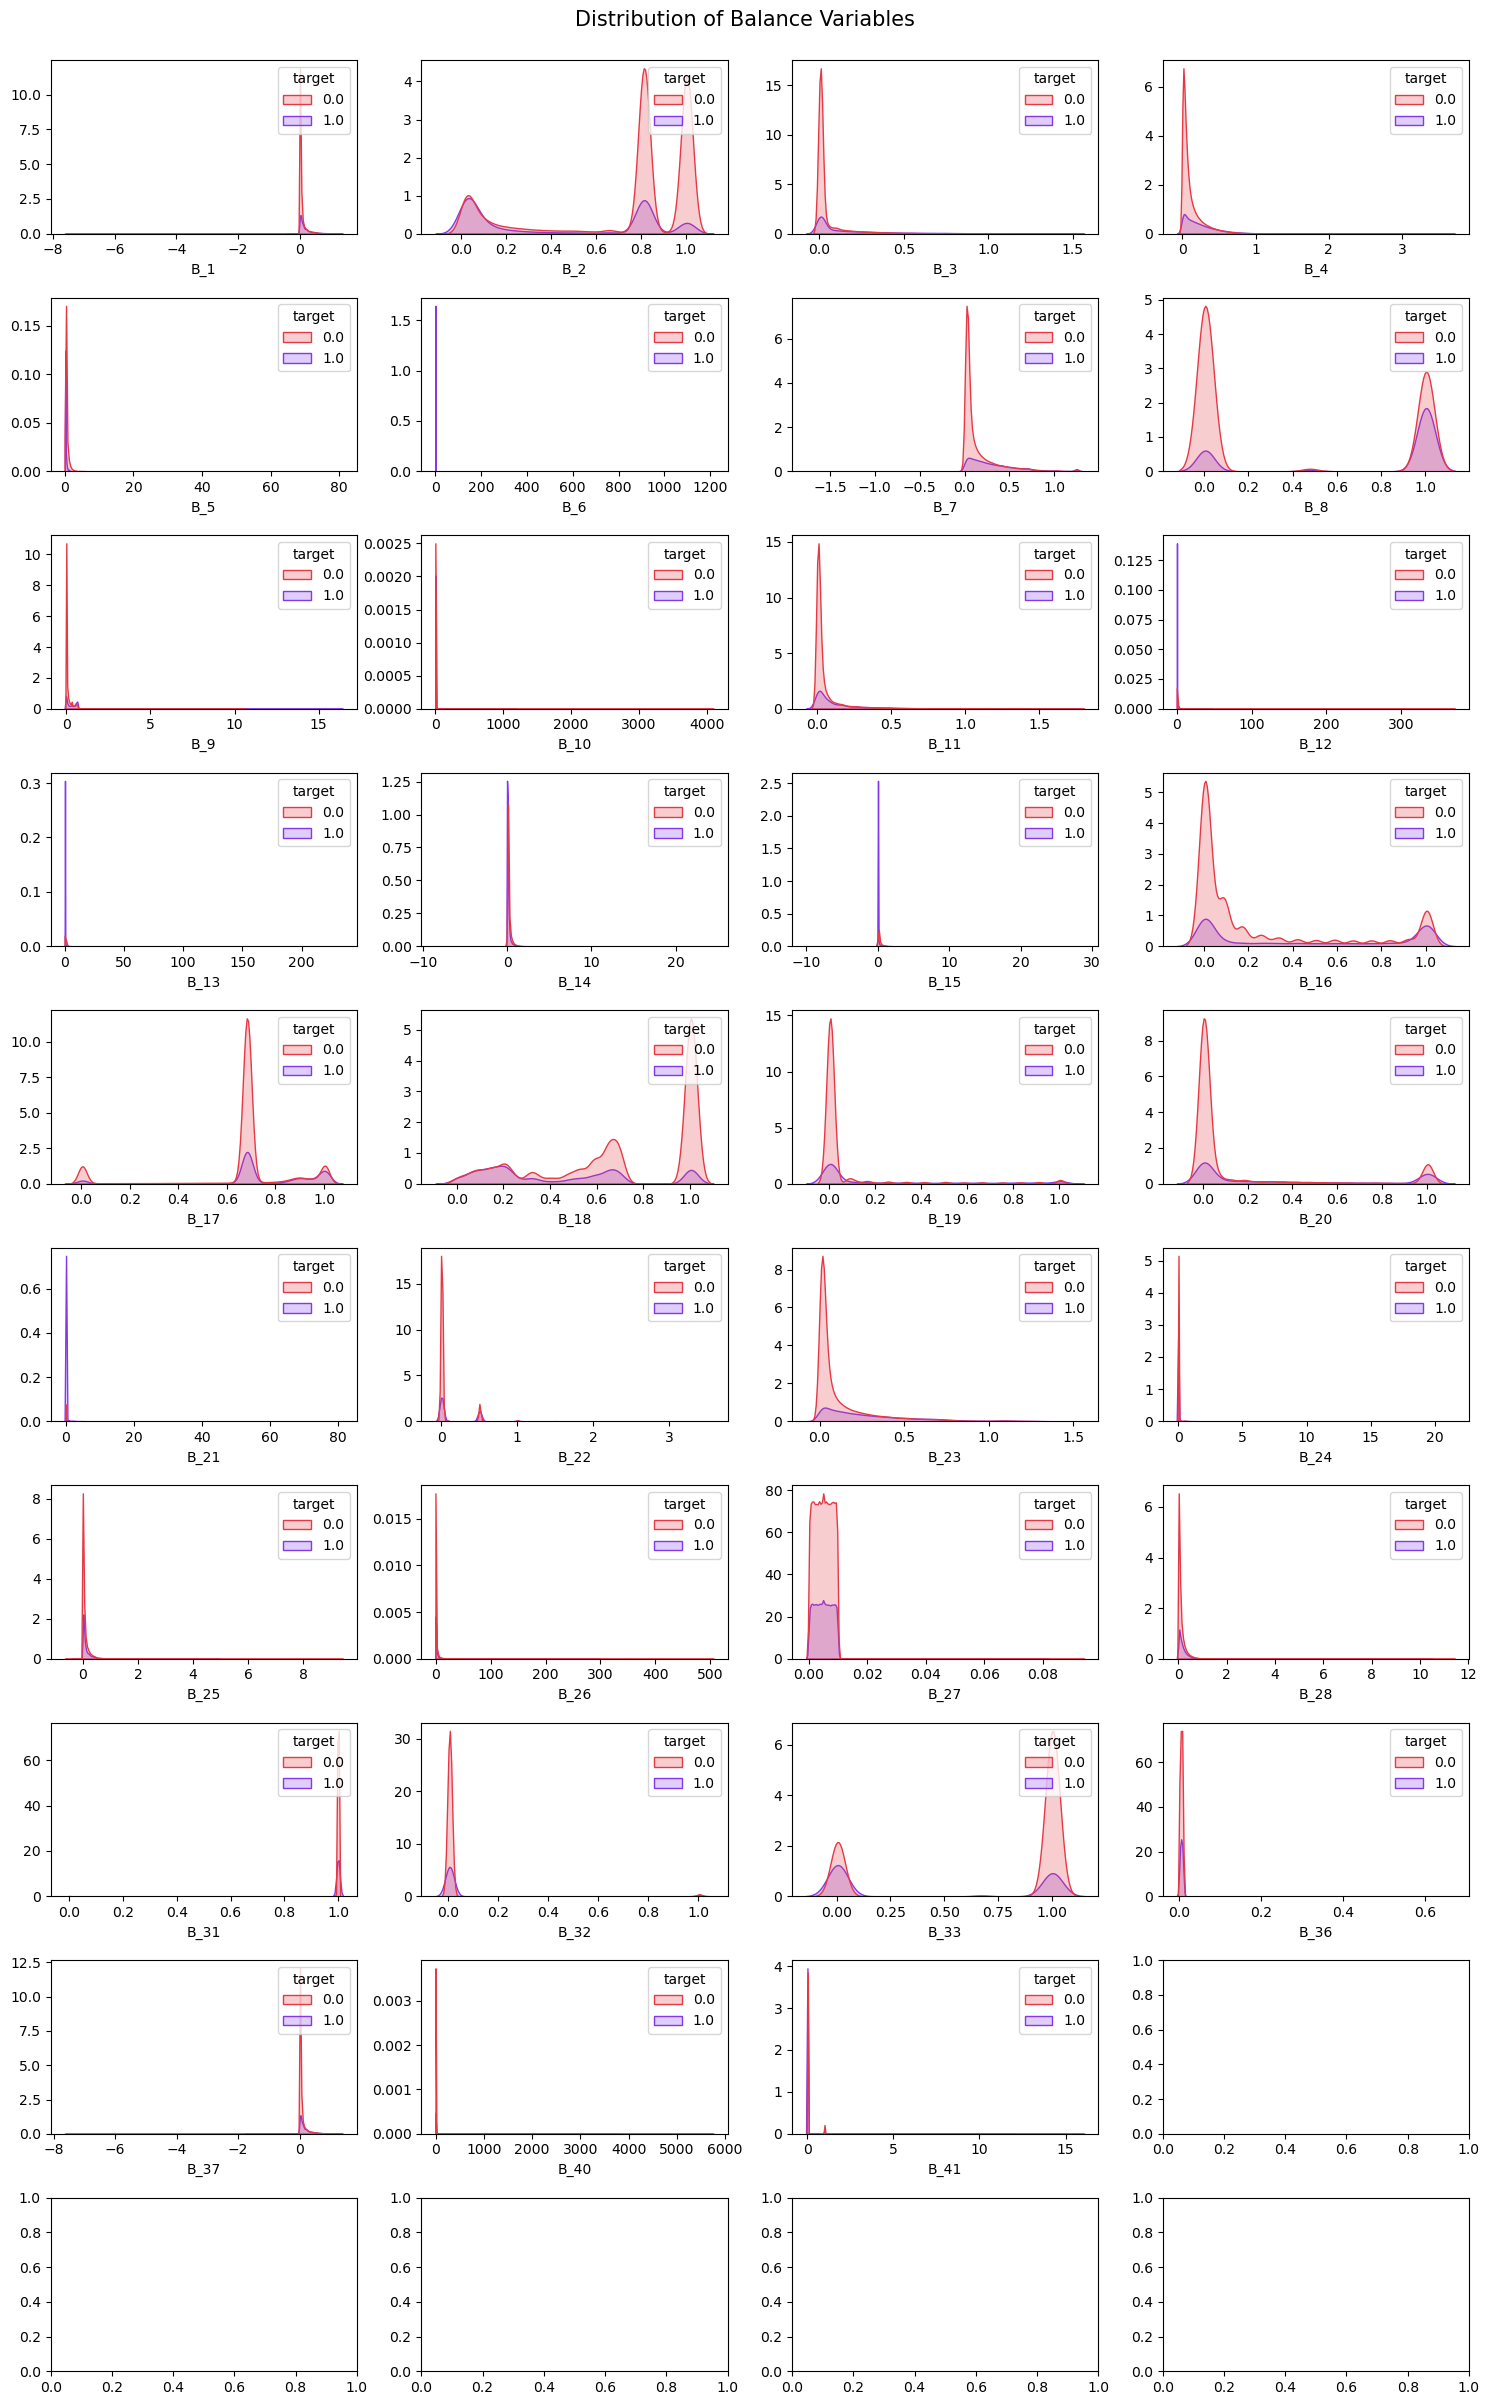

In [61]:
fig, axes = plt.subplots(10, 4, figsize = (15,24))
fig.suptitle('Distribution of Balance Variables',fontsize = 15, x = 0.5, y = 1)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(bal_cols) - 1:
        sns.kdeplot(x = bal_cols[i], hue ='target', data = df_bal, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

### creating a subset of your DataFrame combined by selecting columns that start with the prefix 'B'. 

In [62]:
B_cols = [c for c in combined.columns if (c.startswith(('B')))]
df_B = combined[B_cols]

### Code generates a heatmap to visualize the correlation matrix of the Balance variables in the DataFrame df_B.

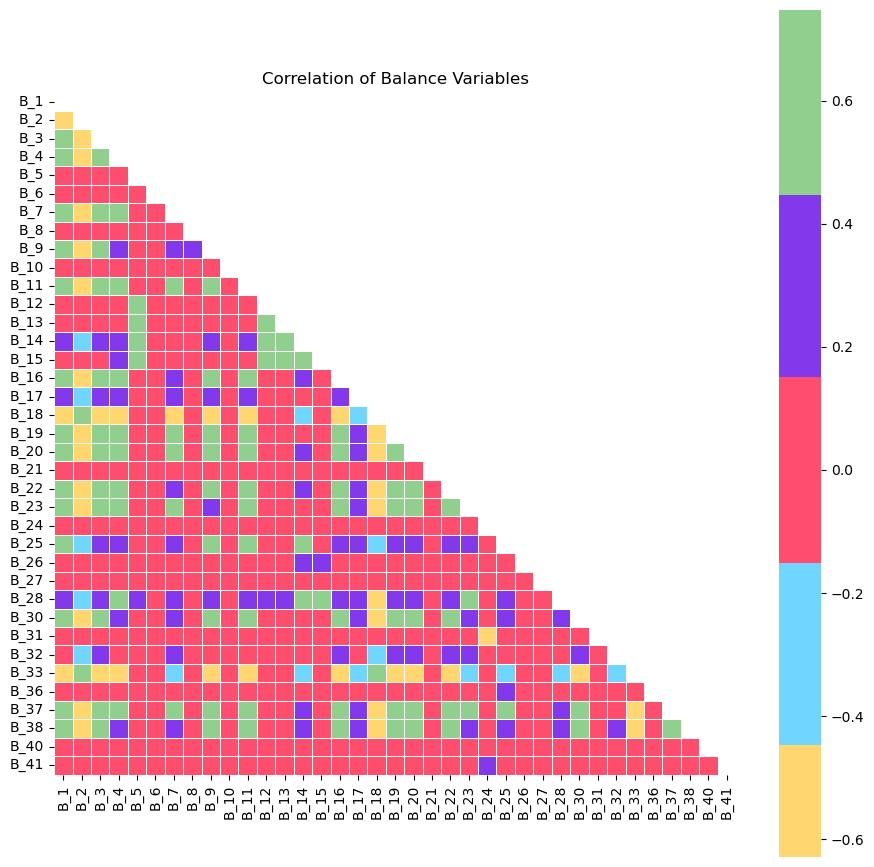

In [63]:
plt.figure(figsize = (11,11))
corr = df_B.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust=True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Balance Variables')
plt.show()

### Creating subplots to visualize the distribution of Risk variables based on the 'target' variable using Kernel Density Estimation (KDE) plots.

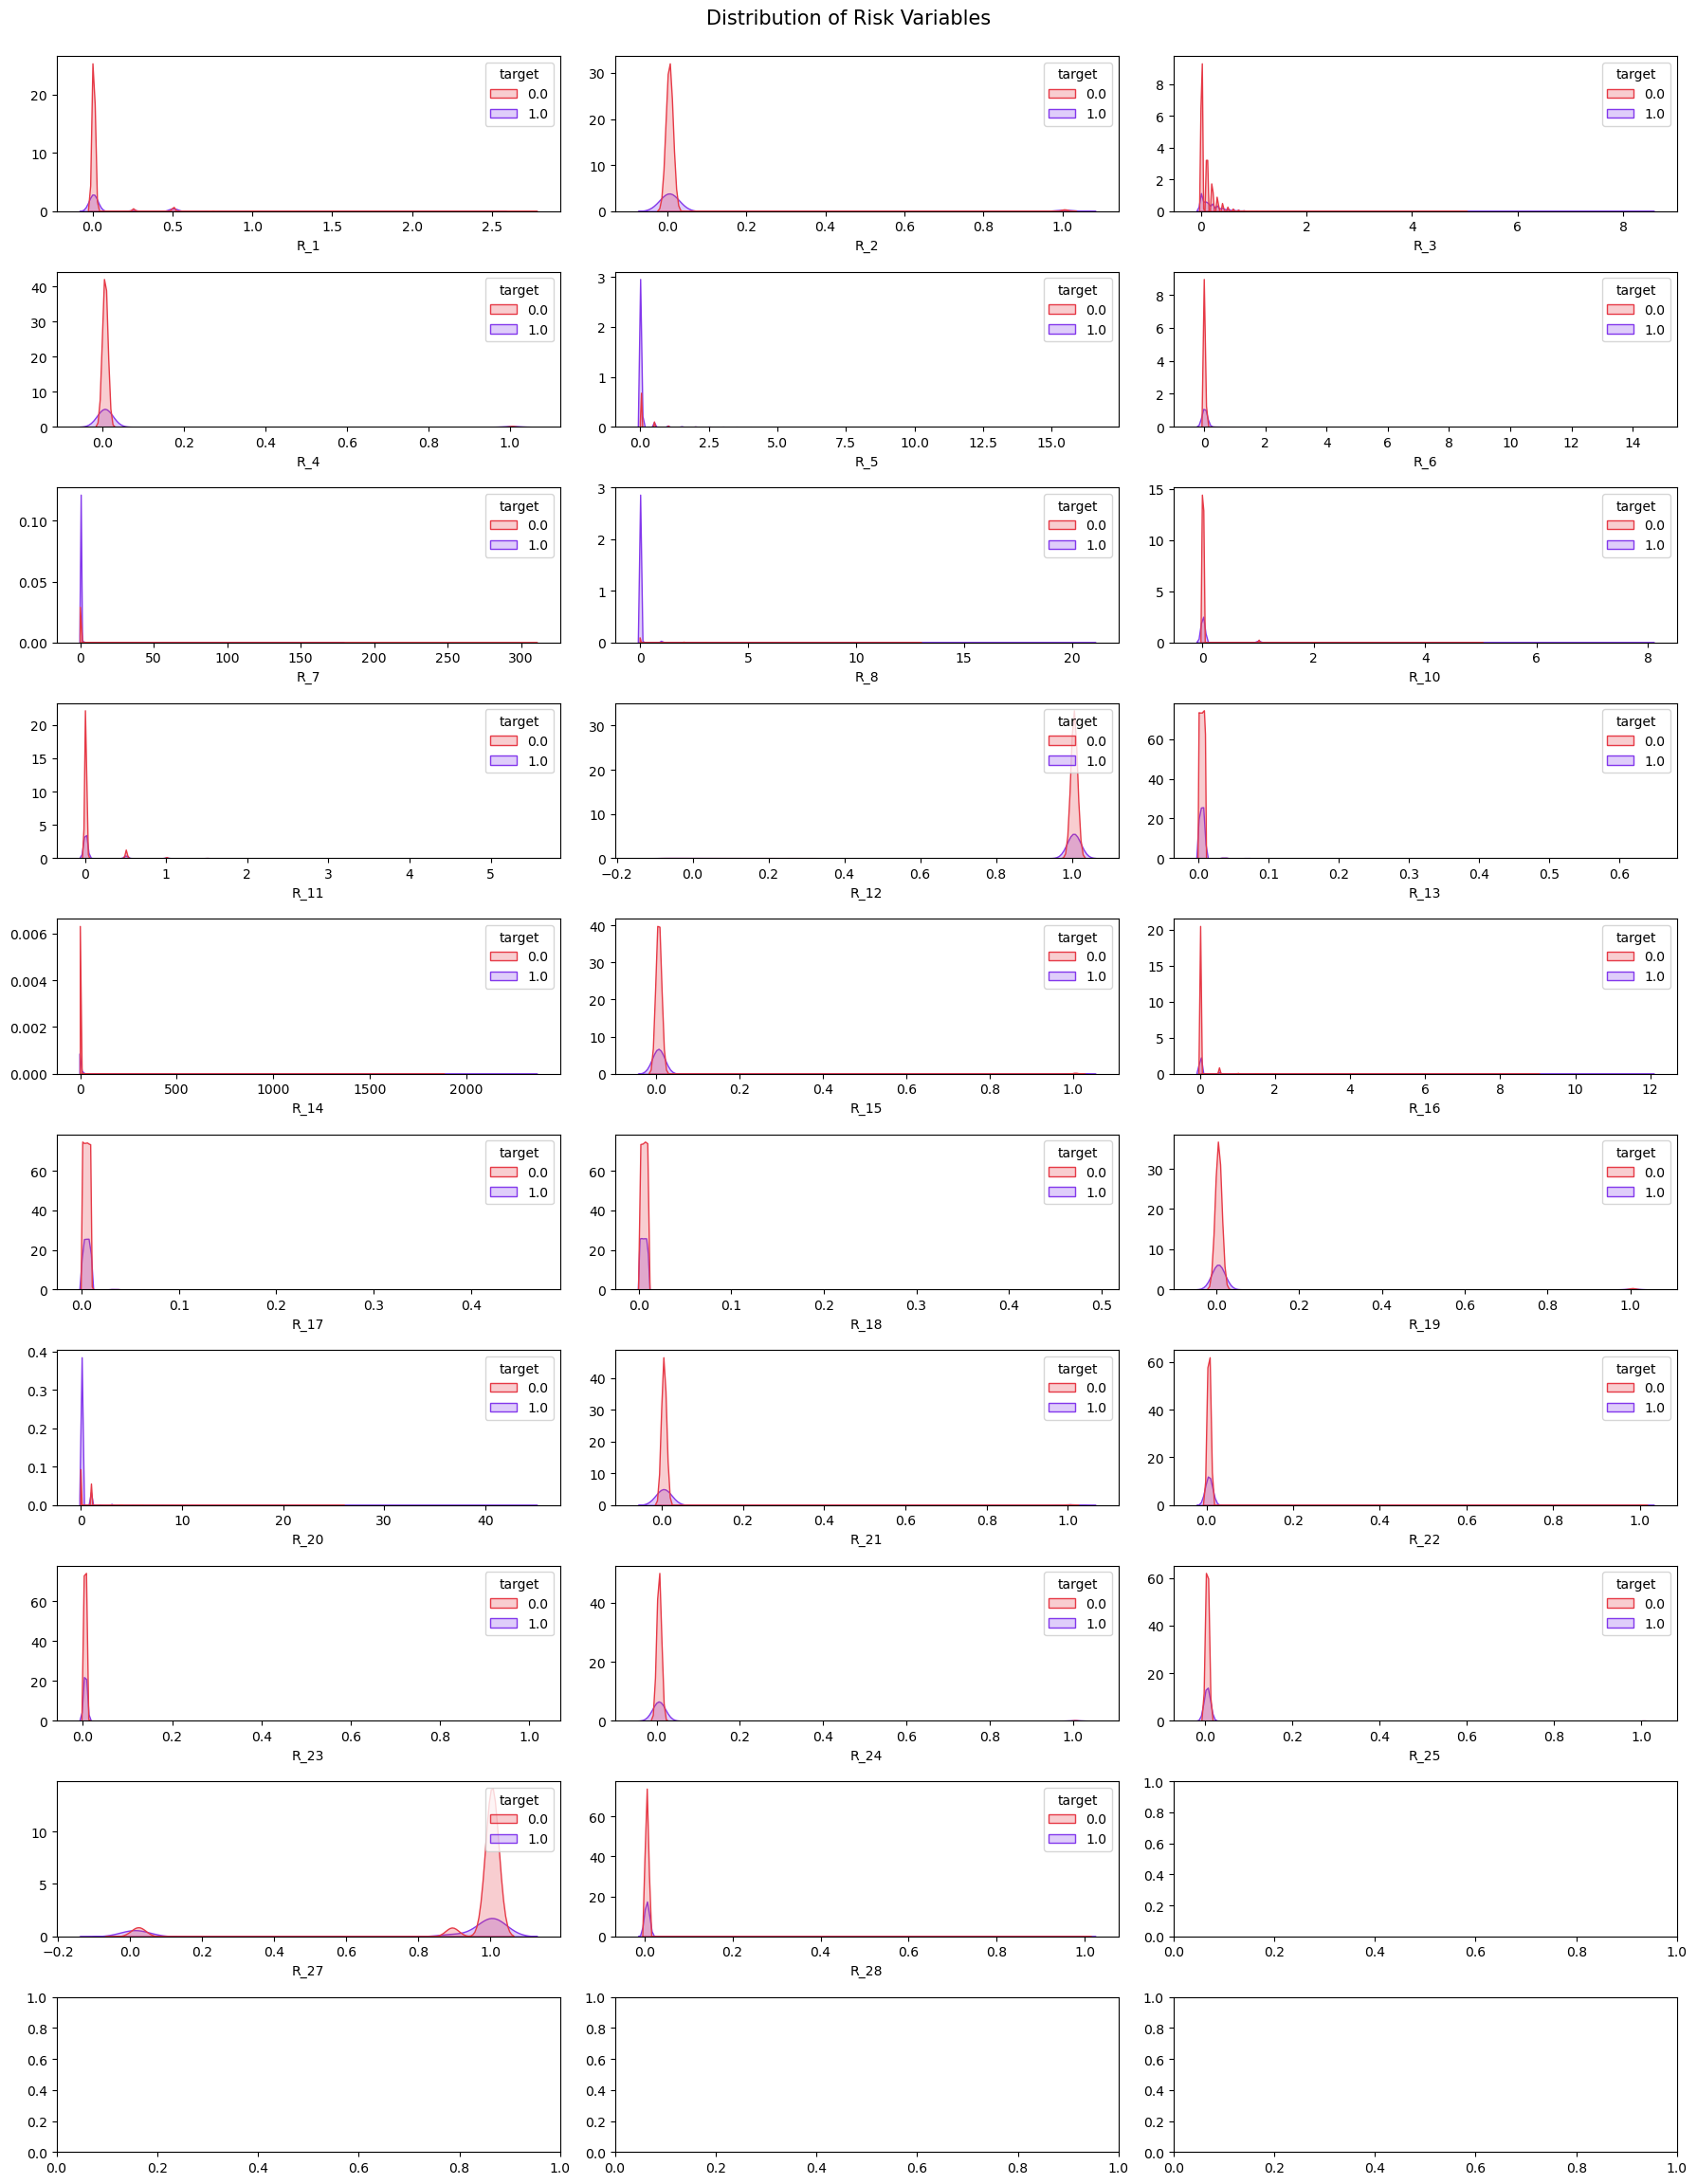

In [64]:
fig, axes = plt.subplots(10, 3, figsize = (18,23))
fig.suptitle('Distribution of Risk Variables',fontsize=15, x = 0.5, y = 1)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(ris_cols) - 1:
        sns.kdeplot(x = ris_cols[i], hue ='target', data = df_ris, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [65]:
R_cols = [c for c in combined.columns if (c.startswith(('R')))]
df_R = combined[R_cols]

### to create a heatmap to visualize the correlation matrix of the Risk variables in the R

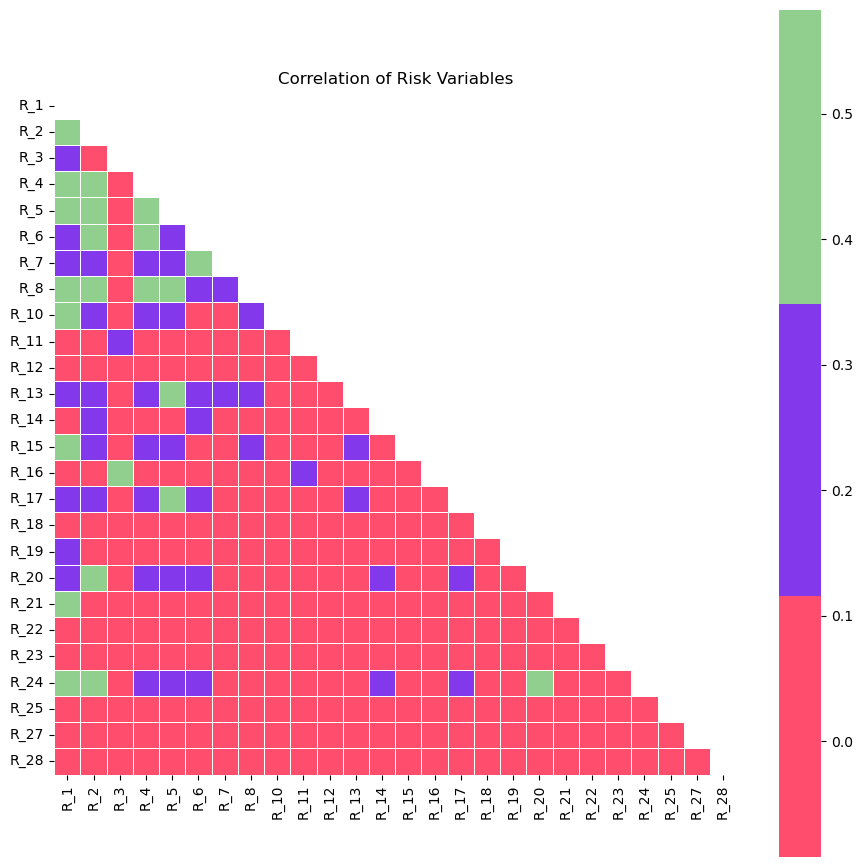

In [66]:
plt.figure(figsize=(11,11))
corr = df_R.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0, square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Risk Variables')
plt.show()

### To create a horizontal bar chart to visualize the correlation of variables with the target variable

In [67]:
palette = cycle(["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"])
targ = combined.corrwith(combined['target'], axis=0)
val = [str(round(v ,1) *100) + '%' for v in targ.values]
fig = go.Figure()
fig.add_trace(go.Bar(y=targ.index, x= targ.values, orientation='h',text = val, marker_color = next(palette)))
fig.update_layout(title = "Correlation of variables with Target",width = 750, height = 3500,
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)')

In [68]:
combined.describe()

P_2          D_39           B_1           B_2           R_1  \
count  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06   
mean   6.618770e-01  1.274102e-01  1.167021e-01  6.542753e-01  5.513470e-02   
std    2.265122e-01  2.284700e-01  2.031981e-01  3.808764e-01  1.755363e-01   
min   -4.338379e-01  0.000000e+00 -7.589844e+00  2.384186e-07  0.000000e+00   
25%    4.985352e-01  4.131317e-03  9.117126e-03  1.912842e-01  2.759933e-03   
50%    6.772461e-01  8.255005e-03  3.041077e-02  8.149414e-01  5.527496e-03   
75%    8.559570e-01  1.789551e-01  1.155396e-01  1.001953e+00  8.285522e-03   
max    1.009766e+00  5.390625e+00  1.324219e+00  1.009766e+00  2.753906e+00   

                S_3          D_41           B_3          D_43          D_44  \
count  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06   
mean   2.213288e-01  4.341362e-02  1.110741e-01  1.554613e-01  1.024796e-01   
std    1.653549e-01  1.595797e-01  2.149166e-01  1.676275e-01  1.928660e-01   
min   -6.005859e-01  0.000000e+00  5.960464e-08  0.000000e+00  0.000000e+00   
25%    1.383057e-01  2.794266e-03  4.791260e-03  6.732178e-02  3.971100e-03   
50%    1.757812e-01  5.588531e-03  9.017944e-03  1.476618e-01  7.934570e-03   
75%    2.220459e-01  8.384705e-03  1.039429e-01  1.593018e-01  1.287842e-01   
max    3.396484e+00  1.211719e+01  1.555664e+00  1.080469e+01  4.625000e+00   

                B_4          D_45           B_5           R_2          D_46  \
count  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06   
mean   1.581723e-01  2.261448e-01  8.018237e-02  3.125307e-02  4.695995e-01   
std    2.064098e-01  2.427976e-01  3.742921e-01  1.599092e-01  1.420075e-01   
min    5.960464e-08  0.000000e+00  5.960464e-08  0.000000e+00 -1.729688e+01   
25%    2.609253e-02  3.768921e-02  6.618500e-03  2.569199e-03  4.396973e-01   
50%    7.702637e-02  1.284180e-01  1.383209e-02  5.138397e-03  4.675293e-01   
75%    2.137451e-01  3.481445e-01  4.983521e-02  7.705688e-03  4.809570e-01   
max    4.160156e+00  1.626953e+00  1.296250e+02  1.009766e+00  1.389844e+01   

               D_47          D_48           B_6           B_7           B_8  \
count  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06   
mean   3.836147e-01  3.650919e-01  1.630644e-01  1.832395e-01  5.146918e-01   
std    2.392313e-01  2.897233e-01  1.401478e+00  2.362834e-01  4.963940e-01   
min   -2.662659e-02 -9.613037e-03 -4.844666e-03 -1.717773e+00  0.000000e+00   
25%    2.108154e-01  1.018066e-01  2.661133e-02  2.830505e-02  5.168915e-03   
50%    3.586426e-01  3.630371e-01  1.231079e-01  7.421875e-02  1.000000e+00   
75%    5.419922e-01  5.551758e-01  1.873779e-01  2.541504e-01  1.004883e+00   
max    1.642578e+00  8.054688e+00  1.215000e+03  1.252930e+00  1.014648e+00   

               D_50          D_51           B_9           R_3          D_52  \
count  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06   
mean   1.778254e-01  1.416815e-01  1.696327e-01  1.287254e-01  1.792523e-01   
std    4.092476e-01  2.412024e-01  2.586854e-01  2.085722e-01  1.741512e-01   
min   -4.984375e+00  0.000000e+00  0.000000e+00  0.000000e+00 -7.007599e-03   
25%    1.356201e-01  3.589630e-03  5.935669e-03  5.012512e-03  7.342529e-02   
50%    1.809082e-01  7.190704e-03  2.680969e-02  1.000366e-01  1.455078e-01   
75%    1.812744e-01  3.356934e-01  2.868652e-01  2.022705e-01  2.287598e-01   
max    1.188125e+02  2.675781e+00  2.960938e+01  9.406250e+00  1.009766e+00   

                P_3          B_10           S_5          B_11           S_6  \
count  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06  1.383534e+06   
mean   6.097775e-01  2.380576e-01  7.971493e-02  1.030274e-01  3.039660e-01   
std    1.485381e-01  5.279396e+00  3.360178e-01  1.983736e-01  4.578184e-01   
min   -1.387695e+00 -2.958298e-03  5.960464e-08  5.960464e-08  0.000000e+00   
25%    5.668945e-01  3.004456e-02  5.451202e-03  6.580353e-03

# Modelling

In [69]:
gc.collect()

120349

In [66]:
# combined = combined.fillna(0)

In [67]:
# from sklearn.preprocessing import LabelEncoder
# lab_enc = LabelEncoder()
# for cat_feat in cat_cols:
  #  combined[cat_feat] = lab_enc.fit_transform(combined[cat_feat])

In [68]:
# X = combined.drop('target', axis=1)
# y = combined['target']

In [69]:
# X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383534 entries, 0 to 1383533
Columns: 164 entries, P_2 to D_145
dtypes: float64(153), int64(11)
memory usage: 1.7 GB


In [70]:
# X.shape

(1383534, 164)

In [71]:
# y.shape

(1383534,)

In [72]:
# from sklearn.ensemble import ExtraTreesClassifier

In [73]:
# model = ExtraTreesClassifier()
# model.fit(X,y)
# print(model.feature_importances_)

[0.01844443 0.00469469 0.00469597 0.00946789 0.00618567 0.00592173
 0.00475417 0.00526292 0.00475333 0.00772735 0.00534383 0.00642911
 0.00412929 0.005392   0.00450018 0.00622488 0.0075773  0.00423106
 0.0058337  0.01062651 0.03405235 0.00559594 0.00656997 0.00686064
 0.00672008 0.00409769 0.00445221 0.0044728  0.00474229 0.0055784
 0.00491574 0.00483077 0.00633418 0.00403996 0.00667793 0.00647906
 0.01554357 0.00392909 0.00432033 0.00869053 0.00824075 0.00388436
 0.02358345 0.00480889 0.00520847 0.00430217 0.00870886 0.00530678
 0.00312831 0.00689674 0.00459489 0.00632359 0.00733561 0.00860409
 0.00578229 0.00175392 0.00613468 0.00750398 0.00447685 0.00436428
 0.00518965 0.00454148 0.00705168 0.00475148 0.00464411 0.00426687
 0.0047532  0.00489825 0.00656167 0.01878062 0.00566812 0.00601245
 0.00439157 0.0043225  0.01170171 0.003977   0.00447283 0.00474246
 0.00416675 0.00440936 0.0044482  0.00454417 0.00468797 0.00520865
 0.00436415 0.00437872 0.00489013 0.00435045 0.00422333 0.00436

In [74]:
# X = combined.iloc[:,:-1]

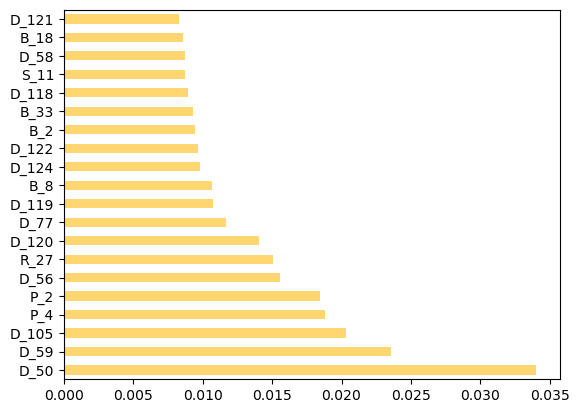

In [75]:
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

In [70]:
data_train = combined[combined['target'].notnull()]
pred_data = combined[combined['target'].isnull()]

In [71]:
x = data_train.drop(columns=['target'])
y = data_train['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=2)

In [72]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((137673, 164), (321240, 164), (137673,), (321240,))

# Base Model

In [73]:
base_model = LogisticRegression()

In [74]:
base_model.fit(x_train, y_train)

LogisticRegression()

In [75]:
y_pred_bm= base_model.predict(x_test)

In [76]:
cm = confusion_matrix(y_test, y_pred_bm)

In [77]:
print('Confusion Matrix:\n',cm)
print(classification_report(y_test, y_pred_bm))

Confusion Matrix:
 [[216470  21549]
 [ 31767  51454]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89    238019
         1.0       0.70      0.62      0.66     83221

    accuracy                           0.83    321240
   macro avg       0.79      0.76      0.77    321240
weighted avg       0.83      0.83      0.83    321240



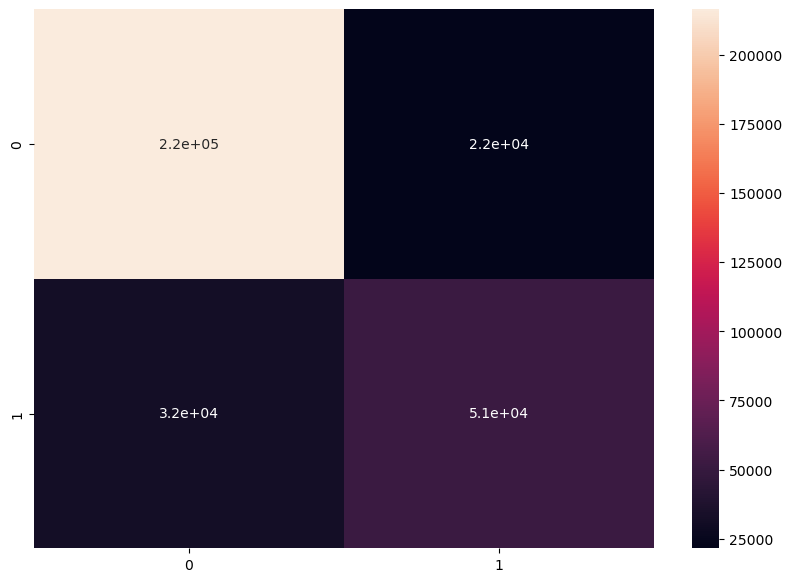

In [78]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

# Decision Tree

In [79]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
y_pred_dt= dt.predict(x_test)

In [81]:
cm = confusion_matrix(y_test, y_pred_dt)

In [82]:
print('Confusion Matrix:\n',cm)
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
 [[201522  36497]
 [ 35896  47325]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85    238019
         1.0       0.56      0.57      0.57     83221

    accuracy                           0.77    321240
   macro avg       0.71      0.71      0.71    321240
weighted avg       0.78      0.77      0.77    321240



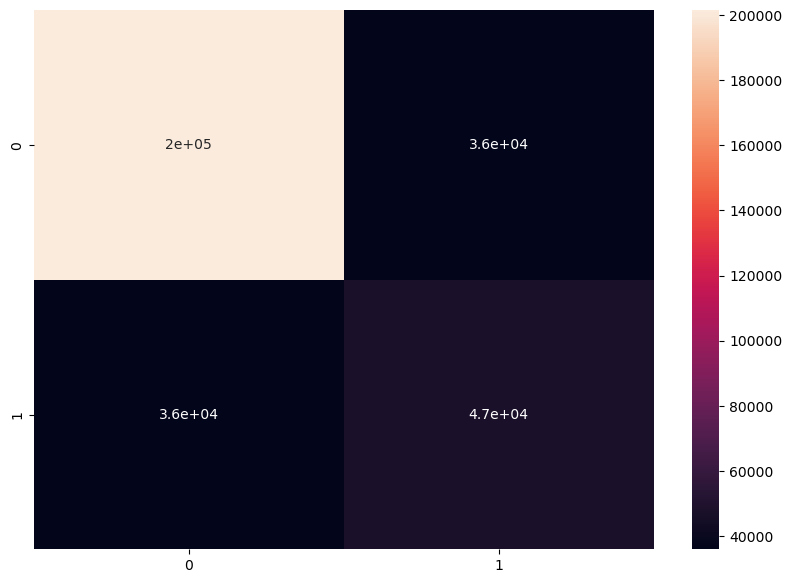

In [83]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

# Random Forest

In [84]:
rf_c = RandomForestClassifier()  
rf_c.fit(x_train, y_train)

RandomForestClassifier()

In [85]:
y_pred_rf_c= rf_c.predict(x_test)

In [86]:
print('Confusion Matrix:\n',cm)
print(classification_report(y_test, y_pred_rf_c))

Confusion Matrix:
 [[201522  36497]
 [ 35896  47325]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89    238019
         1.0       0.70      0.65      0.67     83221

    accuracy                           0.84    321240
   macro avg       0.79      0.78      0.78    321240
weighted avg       0.83      0.84      0.83    321240



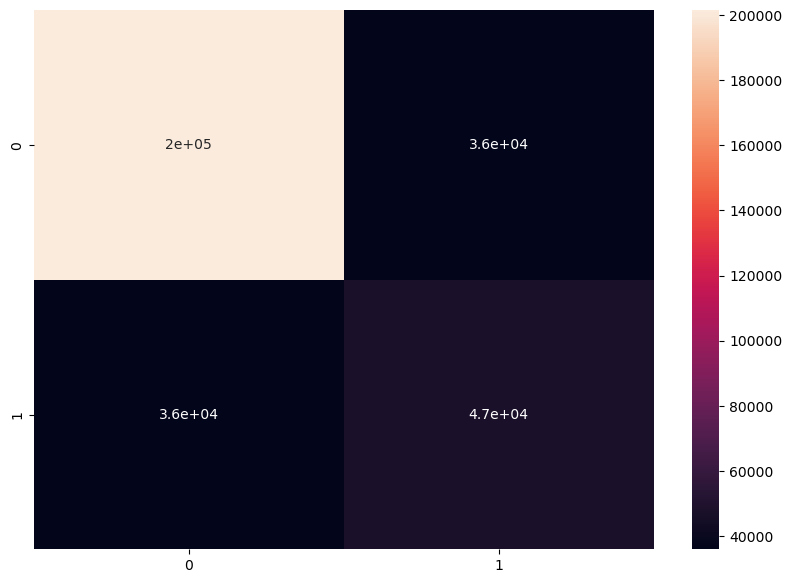

In [87]:
plt.figure(figsize=[10,7],)
sns.heatmap(cm, annot = True)
plt.show()

# XGBoost

In [88]:
xgb_c = XGBClassifier()
xgb_c.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred_xgb_c= xgb_c.predict(x_test)

In [90]:
cm= confusion_matrix(y_test, y_pred_xgb_c)

In [91]:
print('Confusion Matrix:\n',cm)
print(classification_report(y_test, y_pred_xgb_c))

Confusion Matrix:
 [[212792  25227]
 [ 26783  56438]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89    238019
         1.0       0.69      0.68      0.68     83221

    accuracy                           0.84    321240
   macro avg       0.79      0.79      0.79    321240
weighted avg       0.84      0.84      0.84    321240



# Final Model

In [92]:
xgb_c_ht = XGBClassifier(n_estimators=200,gamma=3,n_iter = 100, cv = 3, verbose=2)
xgb_c_ht.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, cv=3, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_iter=100, n_jobs=None, ...)

In [93]:
y_pred_xgb_c_ht= xgb_c_ht.predict(x_test)

In [94]:
cm= confusion_matrix(y_test, y_pred_xgb_c_ht)

In [95]:
print('Confusion Matrix:\n',cm)
print(classification_report(y_test, y_pred_xgb_c_ht))

Confusion Matrix:
 [[212817  25202]
 [ 26617  56604]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89    238019
         1.0       0.69      0.68      0.69     83221

    accuracy                           0.84    321240
   macro avg       0.79      0.79      0.79    321240
weighted avg       0.84      0.84      0.84    321240

